# Homework 2

## Introduction

### Important dates

* Homework release: Thursday, 7th November 2019
* **Homework due: Wednesday, 20th November 2019 (23:59 hours, 11:59 PM)**
* **Peer review due: Wednesday, 27th November 2019 (23:59 hours, 11:59 PM)**
* Grading release: Monday, 9th December 2019

**Some rules:**
* You are allowed to use any built-in Python library that comes with Anaconda. You should make heavy use of `sklearn`, which will save you from (re)implementing any of the classical machine learning algorithms yourself. If you want to use an external library, you have to justify your choice.
* Make sure you use the data folder provided in the repository in read-only mode.
* Be sure to provide textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
* Back up any hypotheses and claims with data, since this is an important aspect of the course.
* Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.
* Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
* **Important Note:** Owing to the scale of the datasets some tasks might take longer to finish, and hence, it is *recommended* that you start working on this homework as early as possible.

# Task A: Applied ML and Reading the Stats

## Description

You have been appointed as the manager/head-coach of Lausanne's men's football team [FC Lausanne-Sport](https://en.wikipedia.org/wiki/FC_Lausanne-Sport), and as a first step towards improving the team you decide to hire a new player. One way to assess the quality of a player would be to watch the games in which he participates. Since there are 22 players on the field, he will typically only have the ball for around 5-10 minutes per game. In addition, the ADA homework takes up all your free time, and hence, you need a more efficient and elegant solution.

You hypothesize that perhaps looking at the *physical capabilities* of the candidates such as *'running'* and *'jumping'* might be a good enough proxy for their skill as a football player. Thus, you come up with the idea of letting candidate players do just a couple of exercises such as *'100m sprint'* and *'high jump'*, and decide on one of the candidates based on his performance in these exercises. Because you are an aspiring data scientist, you want to use machine learning to optimize the player selection.

You come across a dataset of players from the football video game [FIFA 19](https://www.ea.com/games/fifa/fifa-19), which contains hand-annotated data about thousands of real-world football players, in particular about their skills in different domains.
Each row of the dataset corresponds to a player (you might recognize some of them). It contains information such as the player's nationality and their market value. However, the attributes that we are interested in are the skills of the players in various footballing aspects such as *'agility'*, *'dribbling'*, or *'heading accuracy'*. Apart from one attribute (see **A2.1.**), all of them are *non-negative* values in different bounded ranges, where a *higher value* corresponds to the *player being better* in that skill.

### A1. Getting a sense of the data

#### A1.1.
Load the data present at `data/fifa19_players.csv` into a Pandas DataFrame.

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_regression
from regressors import stats    
from sklearn.feature_selection import RFE

In [3]:
data=pd.read_csv('../data/fifa19_players.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df=data.copy()

#### A1.2.
The column *'Overall'* contains a score representing the overall performance of a football player. Before you start, you want to make sure that there is enough diversity in the dataset to draw meaningful conclusions (e.g. it shouldn't be the case that all players come roughly from the same skill class).
* First, think about what kind of distribution you would expect for the overall scores.
* Moving ahead, plot a histogram of the scores with *30 equal-width bins* and analyze the plot. Is this the distribution that you had expected?

### Answer:
The overall score is the accumulation of a large number of contributions that we can suppose are independent. 
According to the Central Limit Theorem, the distribution will be approximately gaussian.

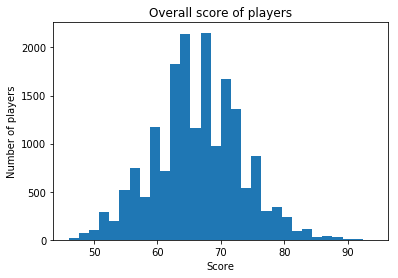

In [5]:
plt.hist(df["Overall"],bins=30)
plt.title("Overall score of players")
plt.xlabel("Score")
plt.ylabel("Number of players")
plt.show()

Although the plot has a bell shape curve, it is not as smooth as we would have expected it. It appears to have many gaps in the distribution. We may hypothesize that these gaps are due to the fact that the data points are not equally distributed in the bins so we might get a smoother result if we refine our bin width selection to have one data point per bin. 

#### A1.3.
If you observe differences from what you expected in **A1.2.**, they might be due to a misrepresentation by the plot. Carefully study the actual values in the *'Overall'* column and **fix** the histogram accordingly! Redo the plot of step A1.2., and briefly state your observations.

In [6]:
df["Overall"].unique()

array([94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46],
      dtype=int64)

The scores are integer values, so it is suitable to set the width of the bins to the range of unique values

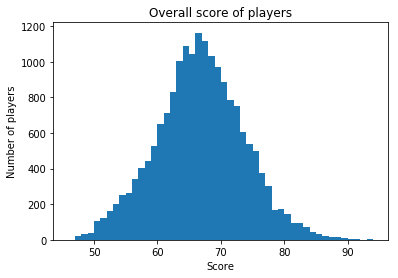

In [7]:
plt.hist(df["Overall"],bins=len(df["Overall"].unique()))
plt.title("Overall score of players")
plt.xlabel("Score")
plt.ylabel("Number of players")
plt.show()

We see that this is a better representation of the distribution. Now it's gaussian, this may look clearer in the following plot:

Text(0.5,0,'Score')

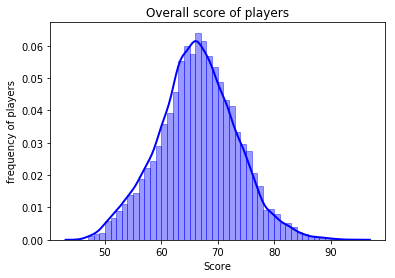

In [8]:
ax= sns.distplot(data['Overall'], hist=True, kde=True, 
             bins=48, color = 'blue', 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth': 2})
ax.set_title("Overall score of players")
ax.set_ylabel("frequency of players")
ax.set_xlabel("Score")

### A2. Preprocessing

The features that you will use for the remainder of the tasks are the following; you can safely discard the rest of the columns.

In [9]:
skills = ['Overall', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

#### A2.1.
Since your final goal will be to train a *linear machine learning model*, all of the features you use need to be *numerical*. 'Work Rate' refers to how much effort a player puts into his play when attacking and defending, respectively, but it is non-numeric and non-atomic. Transform the feature into _two_ numerical features.

In [10]:
# Formatting the display
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df_a2=df.copy()
df_a2=df_a2[skills]
df_a2["Work Rate"].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low'], dtype=object)

In [12]:
# We create a dictionary for the conversion
convert= dict({'Low': 1, 'Medium': 2, 'High': 3}) 

# We separate the two terms for attack and defense
df_a2['Work Rate']=df_a2['Work Rate'].map(lambda x: x.split("/ ") )

# We assign the new columns
df_a2['Attack Work Rate']=df_a2['Work Rate'].map(lambda x: convert.get(x[0]))
df_a2['Defense Work Rate']=df_a2['Work Rate'].map(lambda x: convert.get(x[1]))

# We remove the old one
df_a2 = df_a2.drop(columns=['Work Rate'])

#### A2.2.
As it is true for any real-world dataset out there, you might encounter *missing values*. There are numerous ways to *impute* them (fill them up) by looking at records for which these values are not missing.
* Use a *simple aggregation* of the records for which the values are present (not missing) to fill in the missing values.
* Briefly *justify* the choice of your *aggregation scheme*.

In [14]:
# Find all columns with at least one null value
null_cols=np.sum(df_a2.isnull() , axis=0)
null_cols[null_cols>0]

SprintSpeed    6
dtype: int64

Only Sprint Speed has null values, let's see with what other feature it is correlated

In [15]:
np.abs(df_a2.corr()["SprintSpeed"]).sort_values(ascending=False).head()

SprintSpeed    1.00000
Acceleration   0.92190
Agility        0.76355
Dribbling      0.72680
Positioning    0.66519
Name: SprintSpeed, dtype: float64

In [14]:
df_a2["SprintSpeed"].describe()

count   18153.00000
mean       64.72831
std        14.64860
min        12.00000
25%        57.00000
50%        67.00000
75%        75.00000
max        96.00000
Name: SprintSpeed, dtype: float64

In [15]:
df_a2["Acceleration"].describe()

count   18159.00000
mean       64.61408
std        14.92778
min        12.00000
25%        57.00000
50%        67.00000
75%        75.00000
max        97.00000
Name: Acceleration, dtype: float64

### Aggregation scheme
Speed is highly correlated with acceleration, which is not suprising, so we can aggregate on the Accelaration values and extract the missing values on Speed by taking their rounded average since we assume that Speed values are best derived from the Acceleration values

In [16]:
sprintSpeed_agg=df_a2.groupby('Acceleration').agg('mean')['SprintSpeed'].round(0)
# Here we round the mean since Speed values are integers
sprintSpeed_agg.head()

Acceleration
12.00000   13.00000
13.00000   17.00000
14.00000   25.00000
15.00000   23.00000
16.00000   23.00000
Name: SprintSpeed, dtype: float64

In [17]:
# We select the rows with the null values
rows_to_impute=df_a2.SprintSpeed.isnull()

# We replace them with our aggregation method
correspending_acc=df_a2.loc[rows_to_impute,'Acceleration'].values
df_a2.loc[rows_to_impute,'SprintSpeed']=sprintSpeed_agg[correspending_acc].values

In [18]:
null_cols=np.sum(df_a2.isnull() , axis=0)
null_cols[null_cols>0]

Series([], dtype: int64)

All missing values are fixed

In [19]:
np.where(df_a2.apply(lambda x: x <= 0))

(array([], dtype=int64), array([], dtype=int64))

All values are strictly positive

## A3. Building a regression model

By letting them perform exercises, you have gathered data about the following athletic skills (except for the *overall football performance*) of your candidate players:

In [21]:
athletic_skills = ['Overall', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'Jumping', 'Stamina', 'Strength']

To decide which player to hire, you need to know how these skills transfer to football performance.

To predict the football performance of a player, you want to build a linear model with an additional regularization term to prevent overfitting. The specific model used in this exercise is L2-regularized linear regression, aka "Ridge Regression". It combines the least squares linear regression model that you know from the lecture with a penalty on the norm of the weight vector [1]. The function that Ridge Regression minimizes is

$$||y-Xw||_2^2 + \alpha ||w||_2^2,$$

where $y$ is a vector of overall ratings, $X$ is the matrix of data vectors with each *row* being the features of a football player, $w$ is the weight vector, and $\alpha$ is the (non-negative) regularization parameter.

[1] If there are enough model parameters, a powerful machine learning model will be able to "memorize" the value it is supposed to predict for some training examples. That means, it will perform well on those training examples, but will perform much worse on data that was not used for training. One way to counter this is to penalize large weight values. This can be thought of as reducing the complexity of the model.

### A3.1.
Split the data randomly into a train (70%) and a test set (30%). Use 1 as the random seed.

In [112]:
df_a3=df_a2.copy()
df_a3=df_a3[athletic_skills]

# We seperate the dependant variable from the independant ones
performance=df_a3["Overall"]
df_a3.drop(columns=["Overall"],inplace=True)

# We split the data
seed=1
df_train, df_test, perf_train, perf_test =train_test_split(df_a3,performance,test_size=0.3,random_state=seed)

## A3.2.
Build a Ridge Regression model that predicts a player's overall football performance from the other feature in the list above (sklearn might be helpful here).

Ridge Regression has a regularization parameter $\alpha$. Optimize it in the range [0, 2000] via cross validation. Use as a metric the mean squared error. Plot the cross-validation error as a function of the regularization parameter and choose the best parameter for your final model.

In [113]:
def find_alpha(X,y,alphas=np.arange(0,2000),n_splits=5,plot=False,seed=1):
    
    mse=[]

    for alpha in alphas:

        kf = KFold(n_splits,random_state=seed,shuffle=True)
        kf.get_n_splits(X)
        mean_mse=0

        for train_index, test_index in kf.split(X): 
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            clf = Ridge(alpha)
            clf.fit(X_train, y_train) 
            predictions= clf.predict(X_test)
            mean_mse+=mean_squared_error(y_test,predictions)

        mse.append(mean_mse/n_splits)
    alpha_min=alphas[np.argmin(mse)]
    if plot:
        plt.plot(alphas,mse)
        plt.xlabel("alpha")
        plt.ylabel("Mean squared error")
        plt.title("Cross Validation Error")
        print("Best alpha is ",alpha_min)
        print("Min MSE is ",np.min(mse))
    return alpha_min

Best alpha is  52
Min MSE is  12.256646760724058


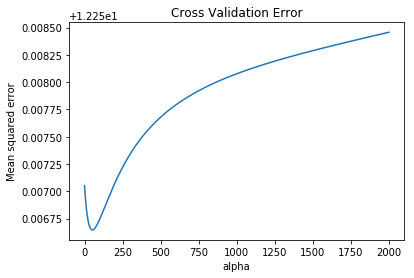

In [34]:
best_alpha=find_alpha(df_train, perf_train,plot=True)

To optimize the hyperparameter alpha, we do K-Fold cross validation with K=5.
We observe the best alpha, that is the aplha that gives the minimum Mean Squared Error equals 52.

In [114]:
rr_opt=Ridge(alpha=best_alpha)
rr_opt.fit(df_train, perf_train)

Ridge(alpha=52, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [115]:
test_error=mean_squared_error(perf_test,rr_opt.predict(df_test))
print("On the test set we get a MSE of {0}".format(test_error))

On the test set we get a MSE of 12.500341434409915


## A4. Feature importance

Hiring new players isn't the only job of a manager/head-coach; another important one is training players. While you are at it, you think, why not use the insights gained from the hiring process to also improve the training process of your entire team? Since a training session can only last a limited amount of time and there are several possible exercises to do, you want to know which athletic skill should your training process focus the most upon. Your idea is to use the *weights* of your regression model as a guidance: In your opinion, a *higher weight* for an athletic skill should mean that this skill is highly *predictive* of the football performance.

### A4.1.
* Print the weights. Why might it *not* be a good idea to use them as they are for gauging a skill's importance?
* How can you fix this?
* What has changed due to your fix?

*Hint: Some skills could get disadvantaged (carefully study the ranges of the corresponding features)! This can be prevented by another preprocessing step discussed in the lecture that takes care of differing ranges, after which you need to train the model again.*

In [116]:
weights=rr_opt.coef_
labeled_weights=pd.DataFrame({"Skills":df_a3.columns,"Weights":weights})
labeled_weights.sort_values(by="Weights",ascending=False)

,Skills,Weights
3,Reactions,0.60514
5,Jumping,0.43099
7,Strength,0.07144
2,Agility,0.04791
1,SprintSpeed,0.01572
0,Acceleration,0.00330
6,Stamina,-0.00750
4,Balance,-0.03279


From the weights we can observe that the skills "Reactions" and "Jumping" have much bigger weights than the others, let's investigate why.

Is it a good idea to interpret the weights of the a mulitple regression model ? Clearly it's not a good idea as each coefficient is influenced by the other variables of the regression model.

Indeed, each coefficient does not measure the total effect on the target variable of its corresponding variable, as it would if it were the only variable in the model.

Rather, each coefficient represents the additional effect of adding that variable to the model, if the effects of all other variables in the model are already accounted for.

We explain more in details  in the "Absence of multicollinearity?" part by giving an example where the regression coefficients are not statistically significant.

In [117]:
df_a3.describe()

,Acceleration,SprintSpeed,Agility,Reactions,Balance,Jumping,Stamina,Strength
count,18159.00000,18159.00000,18159.00000,18159.00000,18159.00000,18159.00000,18159.00000,18159.00000
mean,64.61408,64.72774,63.50361,61.83661,63.96657,0.65089,63.21995,65.31197
std,14.92778,14.64904,14.76605,9.01046,14.13617,0.11820,15.89474,12.55700
min,12.00000,12.00000,14.00000,21.00000,16.00000,0.15000,12.00000,17.00000
25%,57.00000,57.00000,55.00000,56.00000,56.00000,0.58000,56.00000,58.00000
50%,67.00000,67.00000,66.00000,62.00000,66.00000,0.66000,66.00000,67.00000
75%,75.00000,75.00000,74.00000,68.00000,74.00000,0.73000,74.00000,74.00000
max,97.00000,96.00000,96.00000,96.00000,96.00000,0.95000,96.00000,97.00000


We see that the Jumping feature have a range of [0,1], since we are using it as a feature to predict the overall performance which has a range of [0,100], it is expected that the correspending weights would be high. Let's try to fix this by scaling by **MinMaxTransform**

In [118]:
from sklearn.preprocessing import MinMaxScaler 

def MinMaxTransform(df_train,df_test):
    scaler= MinMaxScaler()
    df_train_scaled= pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
    df_test_scaled= pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)
    return df_train_scaled, df_test_scaled

In [119]:
df_a4_train, df_a4_test=MinMaxTransform(df_train,df_test)

We min-max scale the data to have all the features in a range of [0,1].
Also to avoid a the phenomenon of data leakage 
between the test and train data we only fit the scaler with the train data.

In [120]:
df_a4_train.describe()

,Acceleration,SprintSpeed,Agility,Reactions,Balance,Jumping,Stamina,Strength
count,12711.00000,12711.00000,12711.00000,12711.00000,12711.00000,12711.00000,12711.00000,12711.00000
mean,0.61920,0.62769,0.60364,0.54479,0.59989,0.62696,0.60930,0.56576
std,0.17573,0.17404,0.17995,0.12105,0.17527,0.14755,0.18992,0.17149
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.52941,0.53571,0.50000,0.46667,0.50000,0.53750,0.52381,0.46575
50%,0.64706,0.65476,0.63415,0.54667,0.62500,0.63750,0.64286,0.57534
75%,0.74118,0.75000,0.73171,0.62667,0.72500,0.72500,0.73810,0.68493
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


We get a minimum alpha value of 0, it means that it is just an Ordinary Least Squares Regression model.

In [125]:
test_error=mean_squared_error(perf_test,rr_opt.predict(df_a4_test))
print("On the test set we get a MSE of {0}".format(test_error))

On the test set we get a MSE of 12.496698490433676


The transform didn't improve the model but allowed us to get more intrepretable weights. 

### A4.2.
* After the *fix* in step A4.1., is everything fine now with the weights? Sort the weights in descending order. Do you observe anything unexpected with the lowest-ranked weights?
* Do you have an idea what could be the potential cause for this? (No need to analytically prove your hypothesis.)
* Come up with a better way to gauge the importance of a feature for the overall performance.

Stamina and Balance have negative weights. intuitively this means that a player would have a better performance if he has lower stamina and balance. This is counter-intuitive, we will explore furthermore more the data to verify if the assumptions and conditions for multiple regression are verified. 

### Normality

Text(0.5,0,'Standardized residual')

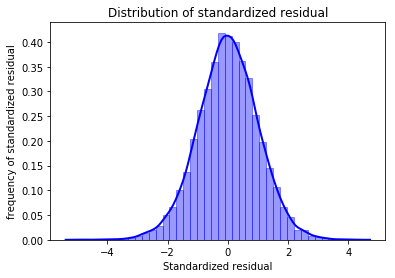

In [198]:
residual= perf_train - rr_opt.predict(df_a4_train)
scaler_res= StandardScaler()
residual_standard= scaler_res.fit_transform(residual.values.reshape(-1,1))

ax= sns.distplot(residual_standard, hist=True, kde=True, 
             bins=40, color = 'blue', 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth': 2})

ax.set_title("Distribution of standardized residual")
ax.set_ylabel("frequency of standardized residual")
ax.set_xlabel("Standardized residual")


We can observe a normal distributon for the standardized residual,this assumption is therefore validated.

### Homoscedasticity

Homoscedasticity describes a situation in which the error term is the same across all values of the independent variables.

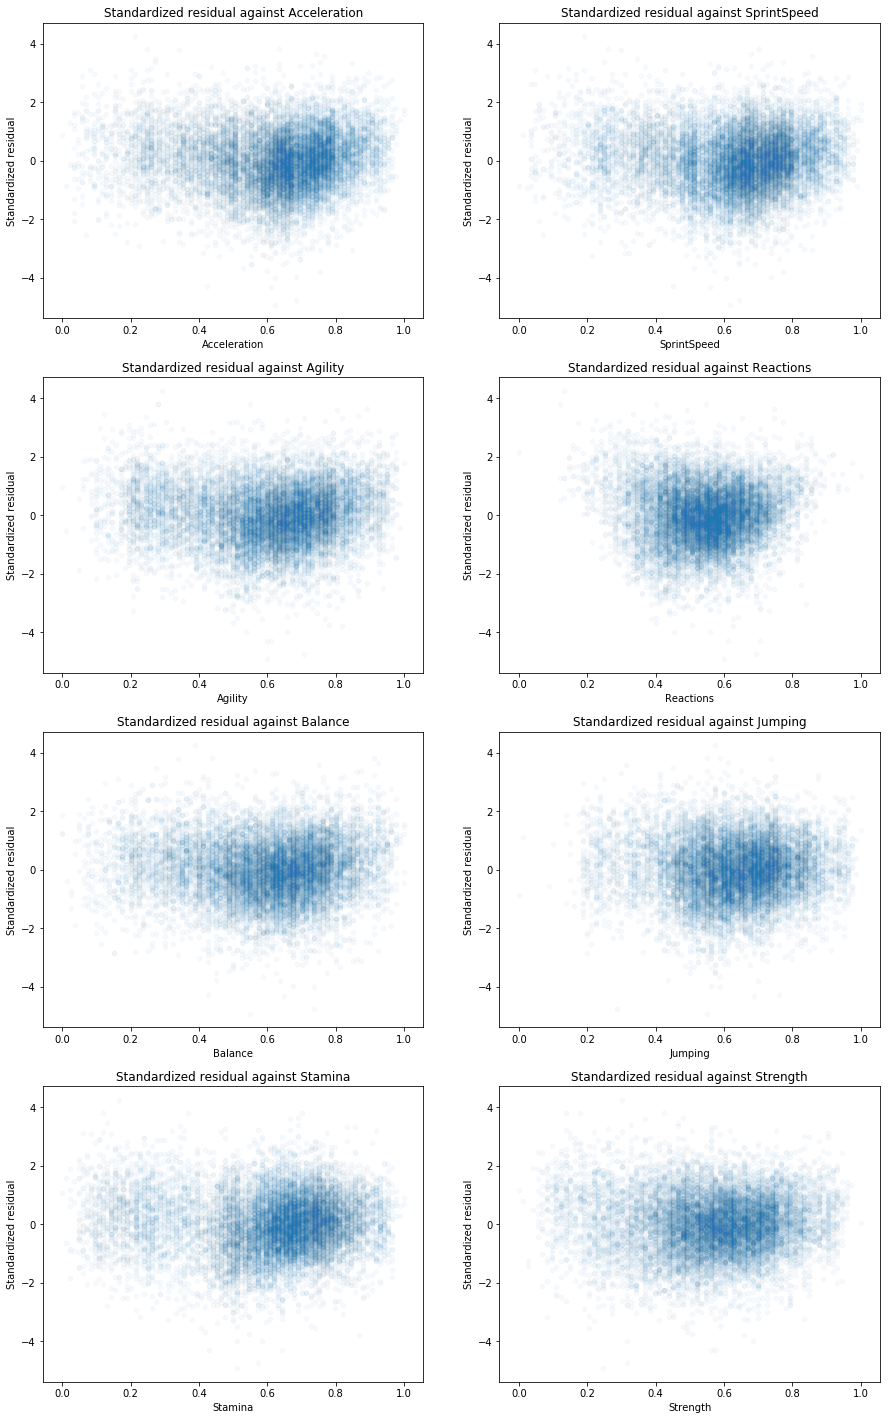

In [199]:
fig = plt.figure(figsize=(15,25))
for ind, column in enumerate(df_a4_train.columns):
    ax = plt.subplot(4,2,ind+1)
    ax.scatter(df_a4_train[column],residual_standard, alpha=0.03, s=20)
    ax.set_xlabel(column)
    ax.set_ylabel("Standardized residual")
    ax.set_title("Standardized residual against {0}".format(column))
plt.show()

The scatterplot of residuals against predicted values shows no obvious changes in the spread about the line.
So we can conclude that the Homoscedasticity property is checked.

### Absence of multicollinearity ?

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.
A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

A multiple regression model where there is high multicollinearity will make it more difficult to estimate the relationship between each of the independent variables and the dependent variable. Small changes in the data used can produce large changes in the estimated coefficients on the independent variables.

While multicollinearity does not reduce a model's overall predictive power, it can produce estimates of the regression coefficients that are not statistically significant. In a sense, it can be thought of as a kind of double-counting in the model. When two or more independent variables are closely related or measure almost the same thing, then the underlying effect that they measure is being accounted for twice (or more) across the variables, and it becomes difficult or impossible to say which variable is really influencing the independent variable.

In [55]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_a4_train.values, i) for i in range(df_a4_train.shape[1])]
vif.index = df_a4_train.columns
vif.sort_values(by="VIF Factor",ascending=False)

,VIF Factor
Acceleration,114.95311
SprintSpeed,98.66636
Agility,50.00999
Balance,34.95778
Reactions,24.94146
Stamina,24.65823
Jumping,22.67213
Strength,18.56850


We observe that Acceleration and SprintSpeed are hilghly correlated with the other variables where as Reactions and Jumping are not. So it is likely that removing them won't significally change the fit

Best alpha is  0
Min MSE is  12.256147420558003


,Skills,Weights
2,Reactions,45.37159
6,Strength,5.16725
1,Agility,3.97210
0,SprintSpeed,1.51777
4,Jumping,0.47053
5,Stamina,-0.62826
3,Balance,-2.62095


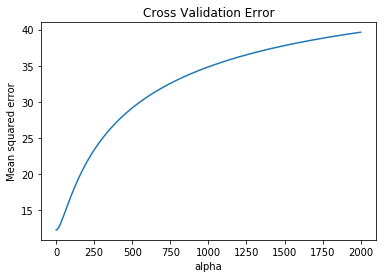

In [201]:
df_sans_acc=df_a4_train.drop(columns=['Acceleration'])
alpha_a4_acc=find_alpha(df_sans_acc,perf_train,plot=True)
rr_opt_acc=Ridge(alpha=alpha_a4_acc)
rr_opt_acc.fit(df_sans_acc,perf_train)
weights_acc=rr_opt_acc.coef_
labeled_weights_acc=pd.DataFrame({"Skills":df_sans_acc.columns,"Weights":weights_acc})
sorted_labeled_weights_acc=labeled_weights_acc.sort_values(by="Weights",ascending=False)
sorted_labeled_weights_acc

In [56]:
import networkx as nx
import matplotlib.cm as cm

def plotCorrGraph(df):
    threshold=0.3
    # Calculate the correlation between features.
    corr = df.corr().abs()
    
    # Transform it in a links data frame (3 columns only):
    links = corr.stack().reset_index()
    links.columns = ['var1', 'var2','value']

    # Remove self correlation (cor(A,A)=1)
    links_filtered=links.loc[(links['var1'] != links['var2'])]
    
    temp = []
    checkvalues= []
    for row in links_filtered.values:
        if row[2]>threshold and row[2] not in checkvalues:
            temp.append(row)
            checkvalues.append(row[2])
        
    links_filtered = pd.DataFrame(temp, columns=['var1', 'var2','value'])
    
    # Build the graph
    G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', )

    # Plot the network:
    mapper = cm.ScalarMappable(cmap=cm.Blues)
    
    nx.draw(G, with_labels=True, font_size=10, alpha=.75, node_color='#A0CBE2', edge_color=mapper.to_rgba(links_filtered.value.values), width=4)
    plt.title("Correlation graph with absolute correlation superior to {0}".format(threshold))
    plt.show()

In [57]:
(df_a2[athletic_skills].corr())["Overall"].sort_values(ascending=False)

Overall        1.00000
Reactions      0.85004
Stamina        0.36566
Strength       0.34933
Agility        0.26495
Jumping        0.26443
SprintSpeed    0.21065
Acceleration   0.19687
Balance        0.10316
Name: Overall, dtype: float64

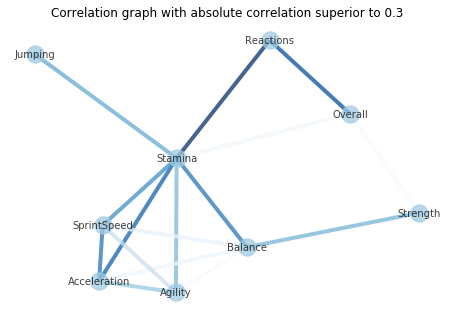

In [62]:
plotCorrGraph(df_a2[athletic_skills])

The correlation graph shows that Balance and Stamina are highly correlated with many other features. This fact explains that they have coefficients with negative values as they already share a lot of information with other features.
Also we can see that  Reactions is only correlated with Overall and Stamina which explains why it has such a big coefficient and Stamina having a negative coefficient. 

## Other ways to gauge Feature importance: 

###  Hypothesis testing 

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that we can reject the null hypothesis. In other words, a features that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

The t-test assesses whether the beta coefficient is significantly different from zero. If the t-value is not significant, the variable does not significantly predict the outcome.  If the beta coefficient is significant, we can examine the sign of the beta. 

In [63]:
stats.summary(rr_opt, df_a4_train, perf_train)

Residuals:
     Min       1Q   Median       3Q      Max
39.46930 62.25520 66.54080 70.29310 89.27970


Coefficients:
            Estimate  Std. Error   t value  p value
_intercept  36.90738     0.18309 201.57690  0.00000
x1           0.28507     0.45183   0.63090  0.52810
x2           1.31597     0.40843   3.22200  0.00128
x3           3.92438     0.31909  12.29880  0.00000
x4          45.37711     0.27957 162.30840  0.00000
x5          -2.64873     0.28659  -9.24230  0.00000
x6           0.47249     0.22321   2.11680  0.03429
x7          -0.64032     0.23268  -2.75200  0.00593
x8           5.17692     0.22390  23.12120  0.00000
---
R-squared:  0.74541,    Adjusted R-squared:  0.74525
F-statistic: 4648.82 on 8 features


In [64]:
pvalue = pd.DataFrame()

pvalue["T value"]= stats.coef_tval(rr_opt, df_a4_train, perf_train)[1:]
pvalue["P value"] = stats.coef_pval(rr_opt, df_a4_train, perf_train)[1:]
pvalue["Reject H0"] =  pvalue["P value"] < 0.05

pvalue.index = df_a4_train.columns
pvalue

,T value,P value,Reject H0
Acceleration,0.63093,0.52810,False
SprintSpeed,3.22198,0.00128,True
Agility,12.29879,0.00000,True
Reactions,162.30838,0.00000,True
Balance,-9.24233,0.00000,True
Jumping,2.11683,0.03429,True
Stamina,-2.75198,0.00593,True
Strength,23.12119,0.00000,True


We conclude that the Acceleration feature is not important and can be removed from the model. 

### Feature ranking with R squared variation

R-squared is a statistical measure of how close the data is to the fitted regression line. We suggest to check  by how much the R-squared value goes up when you add a feature to the rest of the model to gauge the importance of that feature. 

In [40]:
selection= pd.DataFrame(columns=["Predictor Variable evaluated", "R² before", "R² after", "R² variation"])

for column in df_a4_train.columns:

    ridge_1 = Ridge(alpha=alpha_a4)
    X = df_a4_train.drop(columns=column)
    test_before=df_a4_test.drop(columns=column)
    r_before=ridge_1.fit(X,perf_train).score(test_before,perf_test)
    
    ridge_2 = Ridge(alpha=alpha_a4)
    X = df_a4_train
    r_after=ridge_2.fit(X,perf_train).score(df_a4_test,perf_test)
    
    selection=selection.append({"Predictor Variable evaluated" : column,  "R² before" : r_before,  "R² after" : r_after , "R² variation": r_after-r_before } , ignore_index=True)

selection.sort_values(by="R² variation",ascending=False)

,Predictor Variable evaluated,R² before,R² after,R² variation
3,Reactions,0.24896,0.73493,0.48597
7,Strength,0.72767,0.73493,0.00726
2,Agility,0.73281,0.73493,0.00212
4,Balance,0.73337,0.73493,0.00156
5,Jumping,0.73458,0.73493,0.00035
0,Acceleration,0.73485,0.73493,0.00008
6,Stamina,0.73485,0.73493,0.00007
1,SprintSpeed,0.73502,0.73493,-0.00009


The method doesn't give the nature of the relation between the predictor and target variables but only tells us if the model has been improved by the added feature. We can see that the Reactions features improve a lot the model compared to the other features. 

### Recursive feature elimination

First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reache

In [103]:
estimator = Ridge(alpha=alpha_a4)
selector = RFE(estimator, 1, step=1)
selector = selector.fit(df_a4_train, perf_train)

new_ranking= pd.DataFrame(index = df_a4_train.columns)
new_ranking['New Ranking'] = selector.ranking_
new_ranking['Ranking by weight'] = labeled_weights['Weights'].rank(ascending=False).astype(int).values
new_ranking['Different'] = new_ranking['New Ranking'] != new_ranking['Ranking by weight']
new_ranking

,New Ranking,Ranking by weight,Different
Acceleration,8,6,True
SprintSpeed,5,4,True
Agility,3,3,False
Reactions,1,1,False
Balance,4,8,True
Jumping,7,5,True
Stamina,6,7,True
Strength,2,2,False


We can see that we have a different ranking from what we had with the weights, the 3 first most important features reamain the same but the order of importance changes for the other features. 

To conclude, we have presented several methods to gauge the importance of a feature. Each method give us insight from a different perspective. However by combining the different methods we can have a more general point of view on the model, on the role of each feature and how they influence each others. For this particular example, starting from the weights we have tried to demystify the results obtained and we get from different other methods a consistent top 3 of features (Reactions, Strength and Agility) that will hellp the trainer in his objective to improve his players, whereas Acceleration is not really necessary.


## A5. Model Improvements

During the ongoing recruiting process, it turns out that attending all the ADA lectures and tutorials has paid off: Solving the ADA homework went like a charm and you are already done with it. Now you wonder whether it is worth going to some football games of the candidates to assess their football-related skills explicitly, and include these skills in training your ML model.

### A5.1. Improving the model
Train a second model, this time also including as features the football-related skills from the list in the step **A2**. Again use cross validation to compute the best hyperparameter in the range [0,2000].

Best alpha is  1
Min MSE is  6.481263298480657


,Skills,Weights
15,Reactions,21.00696
11,BallControl,11.43712
27,Composure,9.64930
4,HeadingAccuracy,8.57973
32,GKHandling,7.36326
35,GKReflexes,7.04823
31,GKDiving,7.00738
5,ShortPassing,6.72555
1,Skill Moves,6.10700
34,GKPositioning,5.75181


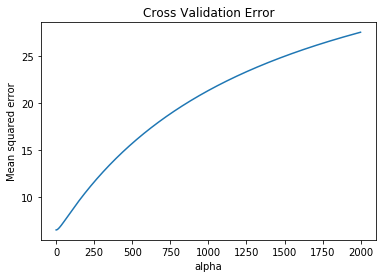

In [104]:
df_a5=df_a2.copy()

# Splitting the X and Y
performance=df_a5["Overall"]
df_a5.drop(columns=["Overall"],inplace=True)

#Splitting the data
df_train, df_test, perf_train, perf_test = train_test_split(df_a5, performance, train_size=0.7,random_state=1)
df_a5_train, df_a5_test= MinMaxTransform(df_train,df_test)

# Finding the best alpha and fitting the model
alpha_a5=find_alpha(df_a5_train,perf_train,plot=True)
rr_opt_a5=Ridge(alpha=alpha_a5)
rr_opt_a5.fit(df_a5_train, perf_train)
weights=rr_opt_a5.coef_

# Printing the weights
labeled_weights=pd.DataFrame({"Skills":df_a5_train.columns,"Weights":weights})
sorted_labeled_weights=labeled_weights.sort_values(by="Weights",ascending=False)
sorted_labeled_weights

### A5.2. Assessing the improvement
Compute *bootstrap confidence intervals* for the mean squared error that the two models (trained in the steps **A3** and **A5.1**) make. Retrain both models *1000 times*, each time with a different random train/test split, and compute the respective mean squared errors.   
*Note: Use the 'optimal regularization parameters' already found via cross validation in steps **A3** and **A5.1**.*

* Find the *two-sided 95% confidence intervals* via bootstrap resampling and plot the mean error together with the confidence interval in a bar plot.
* What can you say about the properties of the models based on the confidence intervals?
* Do you have sufficient evidence to claim that one model is clearly better than the other? Clearly explain your observations!

In [151]:
def bootstrap(x_train,x_test,y_train,y_test,alpha,seed=1,bootstrap_n=1000):
    np.random.seed(seed)
    n=x_train.shape[0]
    mse=[]
    for i in range (bootstrap_n):
        
        index=np.random.choice(n,n)
        x_train_bootstraped=x_train.iloc[index]
        y_train_bootstraped=y_train.iloc[index]
        
        #fitting the regression
        rr=Ridge(alpha)
        rr.fit(x_train_bootstraped,y_train_bootstraped)
        pred=rr.predict(x_test)
        #getting the mean squared error
        mse.append(mean_squared_error(y_test,pred))    
    return mse

mse_a4=bootstrap(df_a4_train, df_a4_test, perf_train, perf_test,alpha_a4)
mse_a5=bootstrap(df_a5_train, df_a5_test, perf_train, perf_test,alpha_a5)

In [152]:
alpha = 0.95
def get_confidence_intervals(stats,alpha):
    # getting the lower bound
    p = ((1.0-alpha)/2.0) * 100
    lower = np.percentile(stats, p)
    
    #getting the upper bound
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper =  np.percentile(stats, p)
    
    # computing the deviation
    ci=(np.mean(stats)-lower, upper-np.mean(stats))
    
    # reshaping to fit in the plot parameter
    ci=np.asarray(ci).reshape(2,1)
    return ci
ci_a4=get_confidence_intervals(mse_a4,alpha)
ci_a5=get_confidence_intervals(mse_a5,alpha)

In [180]:
print("For the first model we obtain a confidence interval of [{0},{1}] of size {2}".format(np.mean(mse_a4)-ci_a4[0,0],np.mean(mse_a4)+ci_a4[1,0],ci_a4[0,0]+ci_a4[1,0]))
print("For the first model we obtain a confidence interval of [{0},{1}] of size {2}".format(np.mean(mse_a5)-ci_a5[0,0],np.mean(mse_a5)+ci_a5[1,0],ci_a5[0,0]+ci_a5[1,0]))

For the first model we obtain a confidence interval of [12.484048391876506,12.536953793153753] of size 0.052905401277246966
For the first model we obtain a confidence interval of [6.418393132415389,6.471134132757987] of size 0.0527410003425981


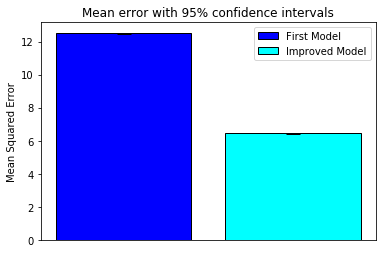

In [168]:
plt.bar(0, np.mean(mse_a4), color = 'blue', edgecolor = 'black', capsize=7,yerr=ci_a4 )
plt.bar(1, np.mean(mse_a5), color = 'cyan', edgecolor = 'black', capsize=7,yerr=ci_a5 )
labels=('First Model','Improved Model')
plt.legend(labels)
plt.title("Mean error with 95% confidence intervals")
plt.ylabel("Mean Squared Error")
plt.xticks([])
plt.show()

We can infer from the plot that the improved model seems to perform better since it produces almost half the error of the old model. Furthermore, the improved model has tighter confidence intervals, and since both models use the same sample size we can conclude that the improved model has less variability and therefore a better accuracy.
Looking at the plot, we can intuitevly conclude that the improved model is better than the other, especially since the confidence intervals are far from overlapping. 
Generally speaking, adding features to the model can only improve the fit as the irrelevant features would simply get low weights. To test the significance of the improvement of the model, we may resort to some testing metrics such as the adjusted R squared that adds a penalty to the number of features

In [181]:
def get_adjusted_r(df_train,df_test,perf_train,perf_test,alpha):
    n_observations=df_train.shape[0]
    n_features=df_train.shape[1]
    penalty=(n_observations-1 )/ (n_observations-n_features)
    rr=Ridge(alpha)
    score=rr.fit(df_train,perf_train).score(df_test,perf_test)
    adjusted_r= 1 - penalty*(1-score)
    return adjusted_r

In [182]:
adjusted_r_a5=get_adjusted_r(df_a5_train,df_a5_test,perf_train,perf_test,alpha_a5)
adjusted_r_a4=get_adjusted_r(df_a4_train,df_a4_test,perf_train,perf_test,alpha_a4)
print("The adjusted R squared of the old model is : ",adjusted_r_a4)
print("The adjusted R squared of the improved model is : ",adjusted_r_a5)

The adjusted R squared of the old model is :  0.7347820197565054
The adjusted R squared of the improved model is :  0.8633483356798808


Now we can conclude that the new model is clearly better

# Task B: Scaling up

## Description

[Reddit](https://www.reddit.com/) aka *'the front page of the internet'* is a network of over a million *communities* aka *'subreddits'*, each of which covers a different topic based on people's interests. In other words, it is a *massive* collection of forums (corresponding to the aforementioned communities), where people can share content specific to a given topic or comment on other people’s posts.   

You are reddit's community manager and want to *appoint new moderators*. Because moderating a specific subreddit isn't a full-time job, you want the chosen moderators to moderate multiple subreddits at the same time. To make this choice effective, the moderators shouldn't have to spend too much time getting to know the community and the prevalent communication style, so it makes sense to let moderators moderate subreddits that are similar in communication style and language. At the same time, it also makes sense to let them moderate subreddits that are similar with respect to the participating users, because this allows moderators to track the behavior of individual users over multiple subreddits. For example, some users might only post offensive content once a month on a given subreddit, and therefore fly under the radar with someone moderating only that subreddit. However, considering all the subreddits these users post to, they might post something offensive every day but on different subreddits. Thus, a moderator in charge of all these subreddits would be able to ban such users much more effectively. In the light of the above description, your task is to find out ways to choose moderators considering both the textual content and the users of a subreddit.

### Dataset:
The dataset provided to you includes all the posts of the 15 largest subreddits written as of May 2015.

Reddit posts (provided to you via a [google drive folder](https://drive.google.com/a/epfl.ch/file/d/19SVHKbUTUPtC9HMmADJcAAIY1Xjq6WFv/view?usp=sharing))
```
reddit_posts
 |-- id: id of the post 
 |-- author: user name of the author 
 |-- body: text of the message
 |-- subreddit: name of the subreddit
```

Reddit scores (provided to you via a [google drive folder](https://drive.google.com/a/epfl.ch/file/d/1vr4PolJzTXr6ODSe3ucib5EAyp3rjxec/view?usp=sharing))
```
reddit_scores
 |-- id: id of the post 
 |-- score: score computed as sum of UP/DOWN votes
```

*Note: Jaccard similarity between subreddits represented using either the set of top-1000 words or the set of users can be computed locally (on the driver), however, all the other tasks have to be implemented in Spark.*

## B1. Getting a sense of the data

Start a PySpark instance...

In [48]:
import pyspark
import pyspark.sql
from pyspark.sql import *
from pyspark.sql.functions import *

conf = pyspark.SparkConf().setMaster("local[*]").setAll([
                                   ('spark.executor.memory', '12g'),  # find
                                   ('spark.driver.memory','4g'), # your
                                   ('spark.driver.maxResultSize', '2G') # setup
                                  ])
# create the session
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# create the context
sc = spark.sparkContext

# FIX for Spark 2.x
locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

In [49]:
#Other imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import scipy.stats as st
from pyspark.ml.feature import Tokenizer, RegexTokenizer
from pyspark.ml.feature import StopWordsRemover
from pyspark.sql.types import IntegerType
import itertools
from pyspark.sql.window import Window

... and load the data in a Spark dataframe.

In [51]:
# load the data
Reddit_Messages = spark.read.json("data/messages.json")
Reddit_Scores = spark.read.json("data/score.json")

In [52]:
Reddit_Messages.printSchema()

root
 |-- author: string (nullable = true)
 |-- body: string (nullable = true)
 |-- id: string (nullable = true)
 |-- subreddit: string (nullable = true)



In [53]:
Reddit_Scores.printSchema()

root
 |-- id: string (nullable = true)
 |-- score: long (nullable = true)



### B1.1. Identify the most active subreddit

Print the list of subreddits along with the following information:
1. The total number of posts
2. The number of users with at least 1 message
3. The mean message length

*Note: Keep everything in one single dataframe and print the list sorted by number of posts in descending order.*

Answer:

We add 3 columns by grouping by subreddits then aggregating as follows: 

1) For the total number of posts we just count everything.

2) To get the number of users with at least 1 message, we count the distinct authors in each subreddit.

3) To get the mean message length, we do an average over the length of the column body for each subreddit.

In [54]:
subreddit_message_counts = Reddit_Messages.groupBy("subreddit")\
                                    .agg(count("*").alias("nr_of_posts"),countDistinct("author")
                                    .alias("users_with_al_one_message"),avg(length(col("body")))
                                    .alias("mean_message_length"))\
                                    .sort(desc("nr_of_posts"))

subreddit_message_counts.show()

+---------------+-----------+-------------------------+-------------------+
|      subreddit|nr_of_posts|users_with_al_one_message|mean_message_length|
+---------------+-----------+-------------------------+-------------------+
|leagueoflegends|    1151287|                   119321| 152.72280760574904|
|            nba|     704862|                    45034| 106.48656758344187|
|          funny|     691139|                   224077| 106.82283882113438|
|           pics|     564502|                   205305|  114.9710045314277|
|            nfl|     534345|                    41593| 148.96989211090212|
|         videos|     511492|                   157628| 170.22702603364274|
|           news|     477658|                    98736|  230.9491602778557|
| DestinyTheGame|     471160|                    37008| 165.41786866457255|
|         soccer|     455215|                    41648| 134.42224663071295|
|          DotA2|     445154|                    41466| 141.48906670500546|
|      world

### B1.2. Identify the largest subreddit

Print *two* different lists of subreddits: ordered by (1) the number of posts, and (2) the number of users. For each subreddit, print the name and the corresponding counts.

Additionally, (3) plot the mean of message length for each subreddit in descending order. Visualise the statistical significance by plotting the 99% confidence intervals for each subreddit as well.

###  1) The number of posts by subreddit

In [55]:
print('Here is the list of subreddits along with The total number of posts (decreasing order):\n')
subreddit_message_counts.select('subreddit', 'nr_of_posts').show()

Here is the list of subreddits along with The total number of posts (decreasing order):

+---------------+-----------+
|      subreddit|nr_of_posts|
+---------------+-----------+
|leagueoflegends|    1151287|
|            nba|     704862|
|          funny|     691139|
|           pics|     564502|
|            nfl|     534345|
|         videos|     511492|
|           news|     477658|
| DestinyTheGame|     471160|
|         soccer|     455215|
|          DotA2|     445154|
|      worldnews|     439417|
|  AdviceAnimals|     411902|
|         hockey|     389329|
|GlobalOffensive|     382017|
|         movies|     354601|
+---------------+-----------+



###  2) The number of users by subreddit

In [56]:
print('Here is the list of subreddits along with The number of users with at least 1 message (decreasing order):\n')
subreddit_message_counts.select('subreddit', 'users_with_al_one_message')\
                        .sort(desc("users_with_al_one_message")).show()

Here is the list of subreddits along with The number of users with at least 1 message (decreasing order):

+---------------+-------------------------+
|      subreddit|users_with_al_one_message|
+---------------+-------------------------+
|          funny|                   224077|
|           pics|                   205305|
|         videos|                   157628|
|leagueoflegends|                   119321|
|  AdviceAnimals|                   115815|
|      worldnews|                    99261|
|           news|                    98736|
|         movies|                    92484|
|GlobalOffensive|                    46686|
|            nba|                    45034|
|         soccer|                    41648|
|            nfl|                    41593|
|          DotA2|                    41466|
| DestinyTheGame|                    37008|
|         hockey|                    25568|
+---------------+-------------------------+



### 3) Next, lets plot the mean of the length of messages for each subreddit in descending order: 

In [57]:
mean_message_length = subreddit_message_counts.select('subreddit', 'mean_message_length')\
                                                .sort(desc("mean_message_length"))
mean_message_length.show()

+---------------+-------------------+
|      subreddit|mean_message_length|
+---------------+-------------------+
|           news|  230.9491602778557|
|      worldnews| 224.93754679495785|
|         videos| 170.22702603364274|
| DestinyTheGame| 165.41786866457255|
|         movies| 164.83209297210104|
|  AdviceAnimals|  159.2513801826648|
|leagueoflegends| 152.72280760574904|
|            nfl| 148.96989211090212|
|GlobalOffensive|  147.2883981602913|
|          DotA2| 141.48906670500546|
|         soccer| 134.42224663071295|
|           pics|  114.9710045314277|
|          funny| 106.82283882113438|
|            nba| 106.48656758344187|
|         hockey|  95.37287230080472|
+---------------+-------------------+



The Dataframe is small enough to be moved to Pandas for the sake of plotting:

In [58]:
mean_message_length_pd = mean_message_length.toPandas()
mean_message_length_pd.head()

,subreddit,mean_message_length
0,news,230.94916
1,worldnews,224.93755
2,videos,170.22703
3,DestinyTheGame,165.41787
4,movies,164.83209


Text(0.5, 1.0, 'Subreddits by length of messages')

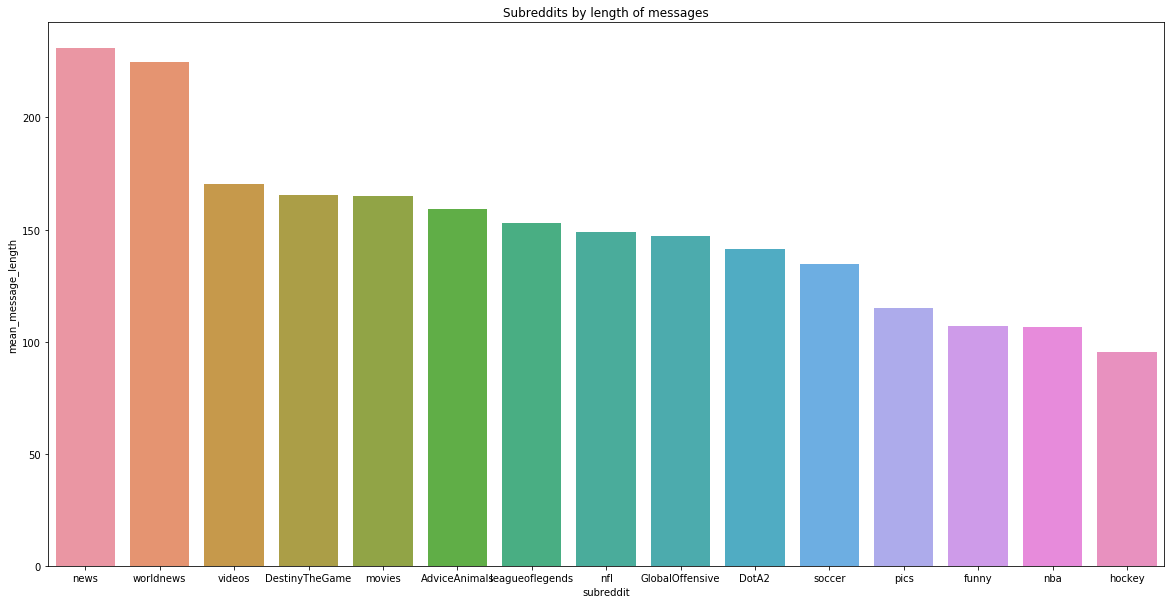

In [59]:
plt.figure(figsize=(20, 10))
ax = sns.barplot('subreddit','mean_message_length',data=mean_message_length_pd, ci=None)
plt.title("Subreddits by length of messages")

Also, lets visualise the statistical significance by plotting the 99% confidence intervals for each subreddit as well:

Here we calculate the standard deviation of the length of messages for each subreddit : 

In [60]:
stddev_message_length = Reddit_Messages.groupBy("subreddit")\
                                    .agg(avg(length(col("body"))).alias("mean_message_length"),stddev(length(col("body"))).alias("stddev_message_length"),count("*").alias("nr_of_posts"))\
                                    .sort(desc("mean_message_length"))
stddev_message_length.show()

+---------------+-------------------+---------------------+-----------+
|      subreddit|mean_message_length|stddev_message_length|nr_of_posts|
+---------------+-------------------+---------------------+-----------+
|           news|  230.9491602778557|    334.5161795310146|     477658|
|      worldnews| 224.93754679495785|    355.4024186574928|     439417|
|         videos| 170.22702603364274|    290.4611624409351|     511492|
| DestinyTheGame| 165.41786866457255|     225.444718254395|     471160|
|         movies| 164.83209297210104|   255.50328567889616|     354601|
|  AdviceAnimals|  159.2513801826648|   238.98344913087263|     411902|
|leagueoflegends| 152.72280760574904|   256.31479868585643|    1151287|
|            nfl| 148.96989211090212|    237.6417855858886|     534345|
|GlobalOffensive|  147.2883981602913|   229.59238382109905|     382017|
|          DotA2| 141.48906670500546|    258.4517118322899|     445154|
|         soccer| 134.42224663071295|    203.6398701954095|     

The Dataframe is small enough to be moved to Pandas for the sake of plotting:

In [61]:
stddev_message_length_pd = stddev_message_length.toPandas()

After talking with the TAs and for the sake of this exercicse, we assume that the data follows normal distribution. 

In [62]:
# We get the appropriate z_value for our desired confidence level (99%)
z_value = st.norm.ppf(1-(1-0.99)/2)
z_value

2.5758293035489004

According to the formula below, we add 3 columns to our initial dataFrame:
- Margin error : range of values below and above the sample statistics in a confidence interval. We calculate it as follows:

    -Get the population standard deviation (σ) and sample size (n).
    
    -Take the square root of your sample size and divide it into your population standard deviation.
    
    -Multiply the result by the z-score consistent with your desired confidence interval according to the following table.
    
    
- CI_low: lower bound of the confidence interval. We calculated it by substracting the error margin from the mean.


- CI_high: upper bound of the confidence interval. We calculated it by adding the error margin to the mean.

![confidence interval](img/confidence_interval.jpg)

In [63]:
ci_pd = stddev_message_length_pd.copy()
ci_pd["margin_error" ]= ci_pd.apply(lambda row: (row.stddev_message_length/np.sqrt(row.nr_of_posts))*z_value ,axis = 1 )
ci_pd["ci_low"]= ci_pd.apply(lambda row: row.mean_message_length - row.margin_error, axis = 1)
ci_pd["ci_high"]= ci_pd.apply(lambda row: row.mean_message_length + row.margin_error, axis = 1)

ci_pd

,subreddit,mean_message_length,stddev_message_length,nr_of_posts,margin_error,ci_low,ci_high
0,news,230.94916,334.51618,477658,1.24674,229.70242,232.19590
1,worldnews,224.93755,355.40242,439417,1.38102,223.55653,226.31856
2,videos,170.22703,290.46116,511492,1.04613,169.18090,171.27316
3,DestinyTheGame,165.41787,225.44472,471160,0.84601,164.57186,166.26387
4,movies,164.83209,255.50329,354601,1.10521,163.72689,165.93730
5,AdviceAnimals,159.25138,238.98345,411902,0.95915,158.29223,160.21053
6,leagueoflegends,152.72281,256.31480,1151287,0.61532,152.10749,153.33812
7,nfl,148.96989,237.64179,534345,0.83739,148.13250,149.80728
8,GlobalOffensive,147.28840,229.59238,382017,0.95683,146.33157,148.24522
9,DotA2,141.48907,258.45171,445154,0.99780,140.49127,142.48686


Text(0.5, 1.0, 'Subreddits by length of messages with 99% confidence interval')

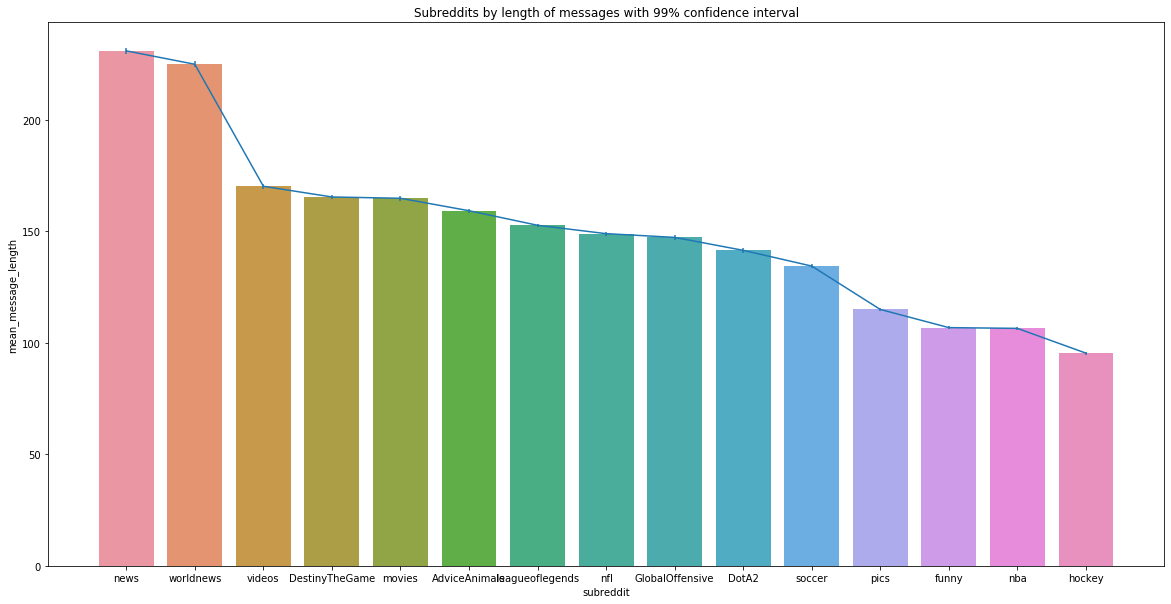

In [64]:
plt.figure(figsize=(20, 10))
ax = sns.barplot('subreddit','mean_message_length',data=ci_pd, ci=None)
plt.errorbar(ci_pd["subreddit"],ci_pd["mean_message_length"], yerr=ci_pd["margin_error"], label='both limits (default)')
plt.title("Subreddits by length of messages with 99% confidence interval")


### B1.3. Identify the subreddit with the highest average score

Print the list of subreddits sorted by their average content scores.

The Reddit_Scores dataframe is composed of ids of posts and relative scores.
Let's make a join with Reddit_Messages in order to have subreddits, posts and scores in a same dataframe:

In [65]:
Reddit_Messages_Scores = Reddit_Messages.join(Reddit_Scores, Reddit_Messages.id == Reddit_Scores.id)
Reddit_Messages_Scores.show()

+--------------------+--------------------+-------+---------------+-------+-----+
|              author|                body|     id|      subreddit|     id|score|
+--------------------+--------------------+-------+---------------+-------+-----+
|      FIDEL_CASHFLOW|   it's worth a shot|cqugak4|            nfl|cqugak4|    2|
|       Heyo_Maggots_|I'm using: http:/...|cqugb1r|            nfl|cqugb1r|    1|
|              Donk72|Starting to feel ...|cqugcoc|          funny|cqugcoc|    1|
|               S8975|           Very cool|cqugext|           pics|cqugext|   11|
|             brutmax|Jesus a technical...|cqugg53|            nba|cqugg53|   -4|
|        Alexlsonflre|Pleasedon'tfuckth...|cqugh9s|            nfl|cqugh9s|    6|
|            PSU19420|Mel Kiper clearly...|cqugiqi|            nfl|cqugiqi|    5|
|             JKaye57|Thatta boy Marty....|cqugisy|         hockey|cqugisy|    2|
|       BlaggerDagger|Government checks...|cqugkli|          funny|cqugkli|   -7|
|       AutoMode

In order to obtain the list of subreddits sorted by their average content scores, we group by subreddits then average over the score of all messages posted in that subreddit

In [66]:
Reddit_Messages_Scores = Reddit_Messages_Scores.groupBy("subreddit")\
                                    .agg(avg("score").alias("scores_avg"))\
                                    .sort(desc("scores_avg"))
print('Here is the list of subreddits along with The average content score (decreasing order):\n')
Reddit_Messages_Scores.show()

Here is the list of subreddits along with The average content score (decreasing order):

+---------------+------------------+
|      subreddit|        scores_avg|
+---------------+------------------+
|         videos|12.649445152612358|
|           pics|12.216559020162904|
|          funny|12.041505399058655|
|  AdviceAnimals|11.251695791717447|
|         soccer|10.634627593554693|
|         movies|  9.82014997137628|
|            nfl| 9.048348913155358|
|            nba| 9.032795071943161|
|           news| 8.673421150697779|
|      worldnews|  7.86683719564787|
|         hockey| 6.520120515039979|
|leagueoflegends| 5.983557531701479|
|          DotA2| 4.880537971129092|
|GlobalOffensive| 4.351442475073099|
| DestinyTheGame|3.0288819084811953|
+---------------+------------------+



## B2. Moderator assignment based on Subreddit Textual Content

Different subreddits follow different communication styles inherent in the topic and the community. Having said that, the goal is to discover similar subreddits by only looking at the *words* present in the posted messages. Once such a list of similar subreddits is identified, an appropriately chosen moderator can then be assigned to all these subreddits.

Specifically, the task boils down to computing a similarity score between two subreddits based on the *words* present in their textual content. Your first idea is to use the *Jaccard similarity*, which is defined as the size of the intersection of two sets divided by the size of their union.

$Jaccard(A,B) = \frac{|A \cap B|}{|A \cup B|}$

In [67]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

### B2.1.
The first step requires constructing a set representation of each subreddit. The goal is to represent each subreddit as a *set of words* existing in the messages posted on that subreddit. Compute the 50,000 most frequent words across all the provided subreddits. Construct a representation for each subreddit by retaining only the words found in the previously identified set of 50,000 frequent words.

Some rules:
 * Words are defined as tokens matching the regular expression `\W`
 * Remove all the stop-words (English language)

*Note: You might find the [RegexTokenizer](https://spark.apache.org/docs/2.2.0/ml-features.html#tokenizer) and the [StopWordsRemover](https://spark.apache.org/docs/2.2.0/ml-features.html#stopwordsremover) utilities available in the package pyspark.ml useful for this task as they help you in transforming the features and removing stopwords.*

In [68]:
# We transform words in the body of messages so that they would 
# be defined as tokens matching the regular expression \W.
regexTokenizer = RegexTokenizer(inputCol="body", outputCol="words", pattern="\\W")
regexTokenized = regexTokenizer.transform(Reddit_Messages)

# We remove all stop-words (English language) and output the list
# of filtered words in a new filtered column.
remover = StopWordsRemover(inputCol="words", outputCol="filtered")

filtered_words = remover.transform(regexTokenized)

filtered_words = filtered_words.drop('author','id','body','words')

filtered_words.show()

+---------------+--------------------+
|      subreddit|            filtered|
+---------------+--------------------+
|            nba|[gg, one, watch, ...|
|GlobalOffensive|[nihilum, lg, sig...|
|           pics|   [hammock, fabric]|
|leagueoflegends|[well, think, new...|
|  AdviceAnimals|[something, hear,...|
|         videos|[aren, responsibl...|
|            nba|[well, yeah, firs...|
|            nba|[streamlink, http...|
|           news|[1, got, bigwig, ...|
|         movies|[holy, shit, coul...|
|            nfl|[get, make, nickn...|
|            nfl|[https, imgur, co...|
|         videos|[isn, going, keep...|
|          DotA2|[ya, razor, laser...|
|            nfl|[sticky, main, 4,...|
|leagueoflegends|[honestly, much, ...|
|            nfl|[woo, 2015, nfl, ...|
|            nfl|[thank, everywher...|
|         hockey|[silence, sound, ...|
|  AdviceAnimals|              [know]|
+---------------+--------------------+
only showing top 20 rows



In [69]:
# We explode our filtered_words dataframe by transforming each element 
# of a list-like to a row, replicating the index values.
exploded_filtered_words = filtered_words.withColumn('word', explode((col('filtered')))).drop('filtered')

exploded_filtered_words.show()

+---------------+-------------+
|      subreddit|         word|
+---------------+-------------+
|            nba|           gg|
|            nba|          one|
|            nba|        watch|
|            nba|          nfl|
|            nba|        draft|
|            nba|        guess|
|GlobalOffensive|      nihilum|
|GlobalOffensive|           lg|
|GlobalOffensive|significantly|
|GlobalOffensive|       better|
|GlobalOffensive|       theory|
|GlobalOffensive|       really|
|GlobalOffensive|        think|
|GlobalOffensive|  replacement|
|GlobalOffensive|          ptr|
|GlobalOffensive|        leave|
|GlobalOffensive|          clg|
|GlobalOffensive|       better|
|GlobalOffensive|        place|
|GlobalOffensive|       cloud9|
+---------------+-------------+
only showing top 20 rows



In [70]:
# We obtain the most frequent words on Reddit by grouping by words on the previous dataframe, 
# then counting them, sorting them in a decreasing order and limiting by 50000.
most_frequent_50k_words = exploded_filtered_words.groupBy('word')\
    .count()\
    .sort('count', ascending=False)\
    .limit(50000)
most_frequent_50k_words.show()

+------+-------+
|  word|  count|
+------+-------+
|  like|1018978|
|people| 745031|
|   get| 691349|
|   one| 682820|
| think| 575352|
|     m| 569057|
|    re| 517827|
|   com| 497303|
|  time| 456060|
|  good| 454768|
|  game| 452376|
|really| 451527|
|  even| 432973|
|  know| 413379|
|    gt| 404776|
|  http| 395552|
|  well| 352021|
|   see| 351081|
|  much| 348304|
|  also| 333478|
+------+-------+
only showing top 20 rows



In [71]:
# To Keep only the most frequent words in the exploded_filtered_words dataframe, 
# we join it with the most_frequent_words dataframe by ensuring equality on words.
# In other words, we pruned the dataframe containing all our words by keeping
# only the 50000 most frequent words
pruned_50k_words = exploded_filtered_words.join(most_frequent_50k_words,
                                            most_frequent_50k_words.word == exploded_filtered_words.word)\
                                            .drop(exploded_filtered_words.word)
pruned_50k_words.show()

+---------------+-------------+------+
|      subreddit|         word| count|
+---------------+-------------+------+
|            nba|           gg| 23179|
|            nba|          one|682820|
|            nba|        watch|185945|
|            nba|          nfl| 44507|
|            nba|        draft| 27847|
|            nba|        guess| 87497|
|GlobalOffensive|      nihilum|   292|
|GlobalOffensive|           lg|  1042|
|GlobalOffensive|significantly|  7145|
|GlobalOffensive|       better|264974|
|GlobalOffensive|       theory| 11969|
|GlobalOffensive|       really|451527|
|GlobalOffensive|        think|575352|
|GlobalOffensive|  replacement|  3912|
|GlobalOffensive|          ptr|   826|
|GlobalOffensive|        leave| 45666|
|GlobalOffensive|          clg| 20768|
|GlobalOffensive|       better|264974|
|GlobalOffensive|        place| 81121|
|GlobalOffensive|       cloud9|   849|
+---------------+-------------+------+
only showing top 20 rows



In [72]:
# Now, to get the most frequent words by subreddit, we do the opposite of the exploding performed earlier
# by grouping by subreddit and using the collect_set method as an aggregate over the words to go back from
# rows to a list-like structure. 
Reddit_mfrequent_50k_vocabulary = pruned_50k_words.groupBy('subreddit').agg(collect_set("word").alias('vocabulary'))
Reddit_mfrequent_50k_vocabulary.show()

+---------------+--------------------+
|      subreddit|          vocabulary|
+---------------+--------------------+
|         hockey|[swamps, thorne, ...|
|         videos|[swamps, thorne, ...|
|          DotA2|[swamps, thorne, ...|
|           news|[swamps, deterior...|
|  AdviceAnimals|[swamps, thorne, ...|
| DestinyTheGame|[swamps, thorne, ...|
|           pics|[swamps, thorne, ...|
|      worldnews|[swamps, thorne, ...|
|            nfl|[swamps, deterior...|
|         soccer|[swamps, thorne, ...|
|GlobalOffensive|[swamps, thorne, ...|
|leagueoflegends|[swamps, deterior...|
|         movies|[swamps, thorne, ...|
|            nba|[swamps, thorne, ...|
|          funny|[swamps, thorne, ...|
+---------------+--------------------+



### B2.2.
* Compute the Jaccard similarity between all the subreddits using the set representation obtained in step **B2.1.**, and plot in a heatmap the similarity values of all the pairs of subreddits.
* Analyze this plot and discuss your observations. Do you observe that subreddits corresponding to similar topics possess higher Jaccard similarity?
* Provide detailed interpretations of the obtained results. Specifically,
    - Explain the limitations of your conclusions, and discuss the potential reasons.
    - Explain the potential problems with the Jaccard similarity function.

In [73]:
# Now let's calculate Jaccard_similarity between all subreddits

# Since the Jaccard similarity between subreddits represented using either the set of words 
# or the set of users can be computed locally (on the driver), we load the data into a pandas
# dataframe so that we can vizualise it later through a heatmap.
Reddit_mfrequent_50k_vocabulary_pd = Reddit_mfrequent_50k_vocabulary.toPandas()
subreddits = Reddit_mfrequent_50k_vocabulary_pd.subreddit

# We initialize Jaccard_1k_vocab dataframe
Jaccard_50k_vocab_df = pd.DataFrame(index = subreddits, columns= subreddits)
Reddit_mfrequent_50k_vocabulary_pd = Reddit_mfrequent_50k_vocabulary_pd.set_index('subreddit')

# We fill diagonal values by 1 since it is known that a subreddit has Jaccard similarity one with itself 
np.fill_diagonal(Jaccard_50k_vocab_df.values, 1)

# Now we fill the dataframe with Jaccard similarity between all distinct subreddits
for c in itertools.combinations(subreddits, 2):
    Jaccard_50k_vocab_df.at[c[0],c[1]] = Jaccard_50k_vocab_df.at[c[1],c[0]] = jaccard_similarity(Reddit_mfrequent_50k_vocabulary_pd.loc[c[0]].vocabulary,
                                                                                                 Reddit_mfrequent_50k_vocabulary_pd.loc[c[1]].vocabulary)
Jaccard_50k_vocab_df  

subreddit,hockey,videos,DotA2,news,AdviceAnimals,DestinyTheGame,pics,worldnews,nfl,soccer,GlobalOffensive,leagueoflegends,movies,nba,funny
subreddit,,,,,,,,,,,,,,,
hockey,1,0.76642,0.70326,0.75954,0.76084,0.71430,0.76448,0.75383,0.77440,0.74721,0.68509,0.73513,0.75530,0.77298,0.76754
videos,0.76642,1,0.75886,0.90058,0.89265,0.76401,0.91556,0.89482,0.81780,0.79958,0.72045,0.83269,0.85652,0.80156,0.92181
DotA2,0.70326,0.75886,1,0.74393,0.75089,0.74941,0.75288,0.75120,0.71969,0.72090,0.74453,0.79549,0.74303,0.72568,0.75764
news,0.75954,0.90058,0.74393,1,0.89045,0.75841,0.90340,0.90291,0.81804,0.79283,0.70812,0.81283,0.84568,0.79734,0.90322
AdviceAnimals,0.76084,0.89265,0.75089,0.89045,1,0.76339,0.89624,0.87906,0.81123,0.78379,0.71583,0.81062,0.84209,0.79487,0.89935
DestinyTheGame,0.71430,0.76401,0.74941,0.75841,0.76339,1,0.76351,0.75912,0.73753,0.72177,0.72686,0.76161,0.76132,0.73275,0.76506
pics,0.76448,0.91556,0.75288,0.90340,0.89624,0.76351,1,0.89568,0.81868,0.79412,0.71324,0.82411,0.86029,0.79882,0.92267
worldnews,0.75383,0.89482,0.75120,0.90291,0.87906,0.75912,0.89568,1,0.80410,0.79894,0.71413,0.81628,0.84143,0.78693,0.89428
nfl,0.77440,0.81780,0.71969,0.81804,0.81123,0.73753,0.81868,0.80410,1,0.77422,0.69289,0.77245,0.79557,0.81730,0.82309


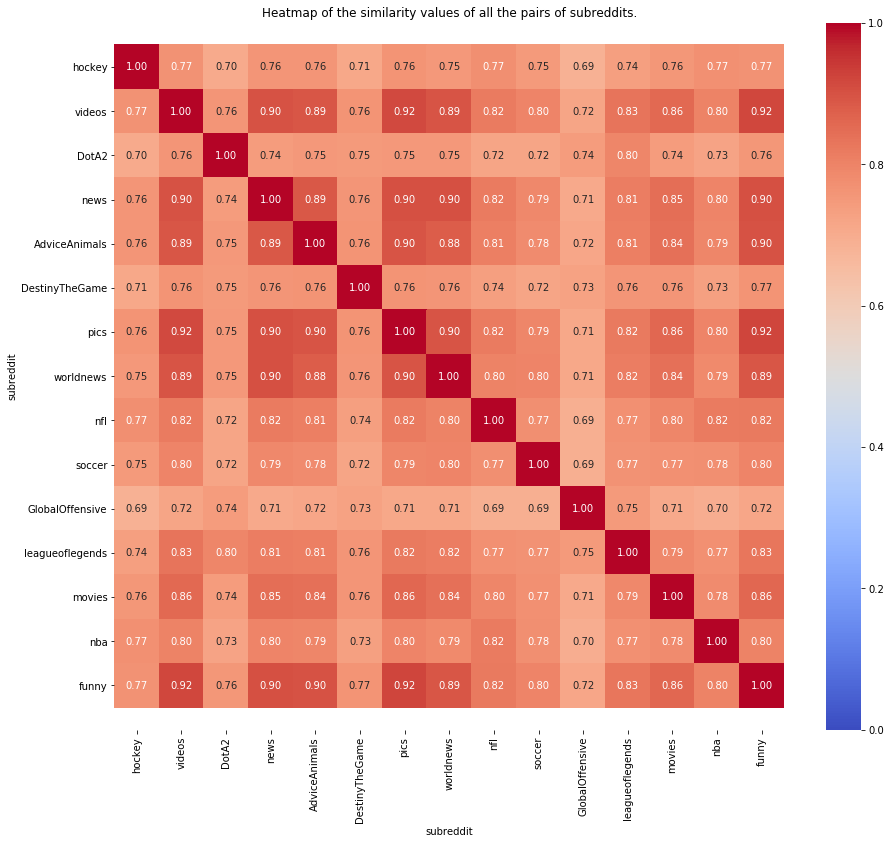

In [74]:
# Plotting the heatmap.
Jaccard_50k_vocab_df.fillna(value=np.nan, inplace=True)
plt.figure(figsize=(15,13))
ax = sns.heatmap(Jaccard_50k_vocab_df, vmin = 0, vmax = 1, annot=True, fmt=".2f", cmap = "coolwarm")

# This is a small fix to have the heatmap not be cropped on the top and bottom parts.
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Heatmap of the similarity values of all the pairs of subreddits.')

ax;

Analyze this plot and discuss your observations. Do you observe that subreddits corresponding to similar topics possess higher Jaccard similarity?
Provide detailed interpretations of the obtained results. Specifically,
Explain the limitations of your conclusions, and discuss the potential reasons.
Explain the potential problems with the Jaccard similarity function.

Answer : 

From this plot we can see that indeed the subreddits discussing similar topics possess higher Jaccard similarity. For example we can see that the pairs (pics,videos), (news,worldnews) , (funny,videos) have the highest jaccard similarity which makes sense.

One possible outlier could be Adviceanimals which is a subreddit discussing a type of image macro series featuring animals of some kind (including humans) that are accompanied by captioned text to represent a character trait or an archetype that fits the role of a "stock character". Adviceanimals seems to have abnormally high jaccard similarity of words with other more serious subreddits such as worldnews and news. That outlier may show the limitation of our conclusion, the jaccard similarity between words used seems to be high overall between subreddits and that may be due to Reddit being an american website with mostly anglophone userbase, and in English there are words that appear in our conversations way more often than others.

One of the limitation of the Jaccard similarity could be that it has some flaws when the sets being compared have different sizes which is the case here ( See figure below ). Since the Jaccard similarity depends on both the union and intersection of sets, it has no sensitivity to the sizes of sets, let's take an example : if subreddit NBA and HOCKEY had 100 words and 50 of them are common to both those subreddits then the Jaccard similarity would be 50/150 = 0.33 but if we increase the size of subreddit NBA by 20 and decrease the size of subreddit HOCKEY by 20 while still keeping the words in common we can see that the Jaccard similarity would stay the same = 0.33 even though the subreddits are more "similar" in a human point of view.

We could have used Cosine Similarity for example that wouldn't have fallen for that problem or Overlap Similarity.


### B2.3.

* Alternatively, compute the 1000 most frequent words for each subreddit, construct its representation as the set of top-1000 words, and print a heatmap with the Jaccard similarity like in step **B2.2.**.
* Explain your observations in detail: how and why is this new result different from the one obtained in **B2.2.**?

*Note: Use the same rules specified in B2.1: words tokenized with the regex \W and stop-words removed*

Answer: 

Here, we will compute the 1000 most frequent words for each subreddit

In [75]:
# To obtain the top 1k words by subreddit we do a grouping by subreddit and word 
# and then count the iterations of words in each subreddit.
subreddit_word_count = exploded_filtered_words.groupBy(['subreddit','word']).count()

# We use the window https://databricks.com/blog/2015/07/15/introducing-window-functions-in-spark-sql.html 
# function to attain the rank of each row based on subreddit and count then we filter to keep the 1000 
# most frequent word for each subreddit.
subreddit_word_count_window = Window.partitionBy(subreddit_word_count['subreddit'])\
                                        .orderBy(subreddit_word_count['count'].desc())
subreddit_word_count_partition = subreddit_word_count.select('*', rank().over(subreddit_word_count_window)\
                                                        .alias('rank')).filter(col('rank') <= 1000)
subreddit_word_count_partition.show()

+---------+------+-----+----+
|subreddit|  word|count|rank|
+---------+------+-----+----+
|   hockey|  like|33899|   1|
|   hockey|  game|32360|   2|
|   hockey|   com|24312|   3|
|   hockey|  team|24072|   4|
|   hockey|   one|22892|   5|
|   hockey|     m|22091|   6|
|   hockey|   get|20629|   7|
|   hockey|  good|20033|   8|
|   hockey| think|19830|   9|
|   hockey|  http|16968|  10|
|   hockey|hockey|16963|  11|
|   hockey|    re|16754|  12|
|   hockey|    go|16222|  13|
|   hockey|really|14661|  14|
|   hockey|  time|14550|  15|
|   hockey|  fuck|14154|  16|
|   hockey|  year|13378|  17|
|   hockey|   see|13150|  18|
|   hockey|  well|12909|  19|
|   hockey|  know|12896|  20|
+---------+------+-----+----+
only showing top 20 rows



In [76]:
# we group by the subreddit then create a list from the top 1000 words to obtain a dataframe containing
# the subreddit and the 1000 most frequent words
Reddit_mfrequent_1k_vocabulary = subreddit_word_count_partition.groupBy('subreddit').agg(collect_set('word')\
                                                                                         .alias('vocabulary'))
Reddit_mfrequent_1k_vocabulary.show()

+---------------+--------------------+
|      subreddit|          vocabulary|
+---------------+--------------------+
|         hockey|[zone, put, u, cb...|
|         videos|[girl, u, put, be...|
|          DotA2|[casting, china, ...|
|           news|[china, girl, put...|
|  AdviceAnimals|[girl, put, u, be...|
| DestinyTheGame|[zone, put, u, gh...|
|           pics|[girl, put, u, be...|
|      worldnews|[china, u, put, k...|
|            nfl|[zone, put, u, ch...|
|         soccer|[yellow, put, u, ...|
|GlobalOffensive|[29_advertising_a...|
|leagueoflegends|[rework, china, u...|
|         movies|[girl, put, u, be...|
|            nba|[put, u, guard, b...|
|          funny|[girl, put, u, be...|
+---------------+--------------------+



In [77]:
# Now let's calculate Jaccard_similarity between all subreddits

# Since the Jaccard similarity between subreddits represented using either the set of words 
# or the set of users can be computed locally (on the driver), we load the data into a pandas
# dataframe so that we can vizualise it later through a heatmap.
Reddit_mfrequent_1k_vocabulary_pd = Reddit_mfrequent_1k_vocabulary.toPandas()
subreddits = Reddit_mfrequent_1k_vocabulary_pd.subreddit

# We initialize Jaccard_1k_vocab dataframe
Jaccard_1k_vocab_df = pd.DataFrame(index = subreddits, columns= subreddits)
Reddit_mfrequent_1k_vocabulary_pd = Reddit_mfrequent_1k_vocabulary_pd.set_index('subreddit')

# We fill diagonal values by 1 since it is known that a subreddit has Jaccard similarity one with itself 
np.fill_diagonal(Jaccard_1k_vocab_df.values, 1)

# Now we fill the dataframe with Jaccard similarity between all distinct subreddits
for c in itertools.combinations(subreddits, 2):
    Jaccard_1k_vocab_df.at[c[0],c[1]] = Jaccard_1k_vocab_df.at[c[1],c[0]] = jaccard_similarity(Reddit_mfrequent_1k_vocabulary_pd.loc[c[0]].vocabulary,
                                                                                               Reddit_mfrequent_1k_vocabulary_pd.loc[c[1]].vocabulary)
                                                                                               
Jaccard_1k_vocab_df  

subreddit,hockey,videos,DotA2,news,AdviceAnimals,DestinyTheGame,pics,worldnews,nfl,soccer,GlobalOffensive,leagueoflegends,movies,nba,funny
subreddit,,,,,,,,,,,,,,,
hockey,1,0.46025,0.40944,0.39373,0.45812,0.39276,0.47601,0.37595,0.52091,0.52551,0.41743,0.42146,0.43647,0.56740,0.48368
videos,0.46025,1,0.41785,0.62105,0.68121,0.42796,0.70093,0.55108,0.45178,0.48409,0.45600,0.43822,0.55271,0.44653,0.71257
DotA2,0.40944,0.41785,1,0.37080,0.40196,0.44823,0.40746,0.36842,0.38985,0.40561,0.49701,0.56128,0.38862,0.39762,0.41343
news,0.39373,0.62105,0.37080,1,0.61843,0.38793,0.58353,0.67112,0.43164,0.44204,0.39373,0.38889,0.47241,0.39567,0.56006
AdviceAnimals,0.45812,0.68121,0.40196,0.61843,1,0.42796,0.69949,0.51933,0.45178,0.46244,0.43410,0.42188,0.50715,0.44132,0.72735
DestinyTheGame,0.39276,0.42796,0.44823,0.38793,0.42796,1,0.42248,0.36749,0.38217,0.39097,0.45033,0.42248,0.40028,0.37931,0.43062
pics,0.47601,0.70093,0.40746,0.58353,0.69949,0.42248,1,0.50980,0.44613,0.47388,0.43781,0.41844,0.54279,0.44300,0.79051
worldnews,0.37595,0.55108,0.36842,0.67112,0.51933,0.36749,0.50980,1,0.40788,0.44452,0.39221,0.39804,0.44308,0.37406,0.49292
nfl,0.52091,0.45178,0.38985,0.43164,0.45178,0.38217,0.44613,0.40788,1,0.50037,0.39665,0.42248,0.42929,0.54679,0.45243


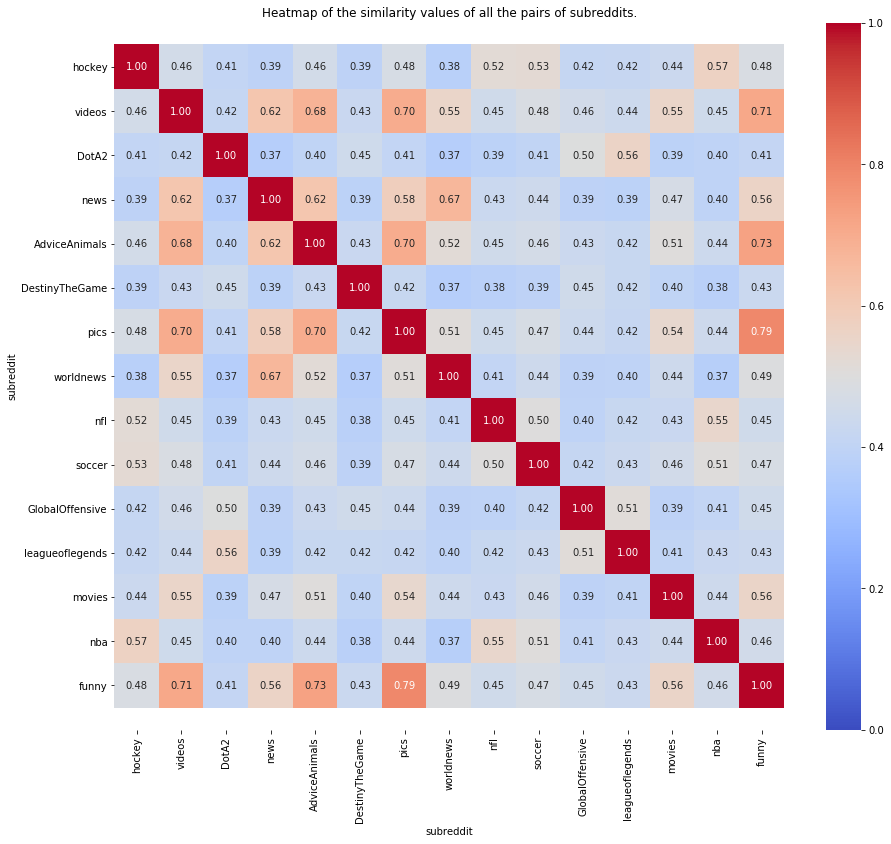

In [78]:
# Plotting the heatmap.
Jaccard_1k_vocab_df.fillna(value=np.nan, inplace=True)
plt.figure(figsize=(15,13))
ax = sns.heatmap(Jaccard_1k_vocab_df, vmin=0, vmax=1, annot=True, fmt=".2f", cmap = "coolwarm")

# This is a small fix to have the heatmap not be cropped on the top and bottom parts.
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Heatmap of the similarity values of all the pairs of subreddits.')

ax;

Explain your observations in detail: how and why is this new result different from the one obtained in B2.2.?

Answer : 
   
We can clearly see that in this plot, it is easier to see clusters for each subreddit depending on similarity. There are more disparity between subreddits that have the same topic and subreddits who don't.

We can clearly divide "clusters" of subreddits by topic as can be seen here :

For <strong>News</strong> related subreddits we can see that the subreddit with highest similarity with news is worldnews.

For <strong>Video Games</strong> related subreddits we can see that Global Offensive, League of Legends and Dota2 are the most likely to be similar with each other in terms of vocabulary used, with League of Legends and Dota 2 having more between them than with Globan offensive which also makes sense since both those games are MOBAs so they share some of the vocabulary.

For <strong>Sports</strong> related subreddits we can see that it is difficult for subreddits to differentiate themselves from others but we can still see that sport subreddits barely use more similar words with each other than with other subreddits. The pairs (nfl,nba) have 0.55 , (nfl,hockey) 0.52, (nfl,soccer) 0.5 => different sports only share some vocabulary with each other.

For <strong>Image/video based </strong> subreddits we can see that the words used in videos, pics, funny and AdviceAnimals are very similar. It can be explained by those subreddits having easy to digest content and most of the comments in there are similar.

One overall remark that we have is that the classic approach to term filtering in information retrieval is fitering out terms at both ends, here we only filtered the terms at the bottom end by choosing the most frequent words but we didn't filter the terms at the top end. Since reddit is an american website, the language spoken in those subreddits is English, and most of the 1000 top words are common english words used in conversations. To actually get the most "useful" terms to compare subreddits, we would have needed to maybe use a TF-IDF approach to filter "useless" common words.




## B3. Moderator assignment based on Subreddit Users

Subreddits can be seen as communities of people interacting about a common topic. As an alternative to the *textual content* based similarity in **B2**, your task here is to validate if similarity between two subreddits can be measured based on their participating users.

Of course users are not monothematic, and they interact with multiple subreddits. In this task, we are specifically interested in observing the amount of overlap across different subreddits based on their participating users. Similar to **B2**, the overlap is measured using the *Jaccard similarity*.


### B3.1.
Construct a set representation of each subreddit as the users that posted at least one time in that subreddit.

Some users are very talkative and active across different topics. Print the username of the person that posted in the maximum number of subreddits. *Note that users who posted at least once in a subreddit are considered as participant of that subreddit.*

In [79]:
Reddit_Messages.show()

+--------------------+--------------------+-------+---------------+
|              author|                body|     id|      subreddit|
+--------------------+--------------------+-------+---------------+
|           WyaOfWade|gg this one's ove...|cqug90h|            nba|
|           BEE_REAL_|Nihilum and LG ar...|cqug90p|GlobalOffensive|
|           SlowRolla|Me too. Same hamm...|cqug916|           pics|
|      SenpaiOniichan|well i think new ...|cqug919|leagueoflegends|
|   backwoodsofcanada|That's something ...|cqug91n|  AdviceAnimals|
|       BurntTheToast|Because we aren't...|cqug91p|         videos|
|       starvinmartin|Well yeah. The fi...|cqug91z|            nba|
|         superiorfox|**[STREAMLINK](ht...|cqug92a|            nba|
|           hogsucker|1-She got to be a...|cqug92b|           news|
|        PoopyVampire|Holy shit, I coul...|cqug92e|         movies|
|           Stokest26|Do you get to jus...|cqug92m|            nfl|
|          Drakengard|https://i.imgur.c...|cqug9

In [80]:
# We construct a set representation of each subreddit as the users that posted at least one time in that subreddit.
subreddit_by_users = Reddit_Messages.groupBy("subreddit").agg(collect_set("author").alias('users'))
subreddit_by_users.show()

+---------------+--------------------+
|      subreddit|               users|
+---------------+--------------------+
|         hockey|[halpinator, Musi...|
|         videos|[Th_Ghost_of_Bob_...|
|          DotA2|[robikasztar, Box...|
|           news|[Almostcomatose, ...|
|  AdviceAnimals|[Mittelstrahl, co...|
| DestinyTheGame|[thefrabbot, rxni...|
|           pics|[LadyCoru, first_...|
|      worldnews|[Almostcomatose, ...|
|            nfl|[ThatImpalerGuy, ...|
|         soccer|[UkuleleSean, ale...|
|GlobalOffensive|[viktor89, Kwadra...|
|leagueoflegends|[VegemilB, iccaru...|
|         movies|[LadyCoru, gfdsag...|
|            nba|[ThatImpalerGuy, ...|
|          funny|[LadyCoru, Almost...|
+---------------+--------------------+



In [81]:
# Username of the person that posted in the maximum number of subreddits
# We group by the authors, count the disctinct subreddits that the author participated in,
# we sort in a descending order by that count and take the first result.
most_active_user = Reddit_Messages.groupBy('author').agg(countDistinct('subreddit')\
                                                .alias("number_of_different_subreddit_participation"))\
                                                .sort("number_of_different_subreddit_participation",ascending = False)\
                                                .limit(1)
most_active_user.show()

+-------+-------------------------------------------+
| author|number_of_different_subreddit_participation|
+-------+-------------------------------------------+
|whispen|                                         15|
+-------+-------------------------------------------+



### B3.2.

* Compute the Jaccard similarity between all the subreddits using the set representation obtained in step **B3.1.**, and visualise it similar to **B2**.
* Analyze this plot, identify highly similar pairs of subreddits, and clearly describe your observations.

In [83]:
# Now let's calculate Jaccard_similarity between all users

# Since the Jaccard similarity between subreddits represented using either the set of words 
# or the set of users can be computed locally (on the driver), we load the data into a pandas
# dataframe so that we can vizualise it later through a heatmap.
subreddit_by_users_pd = subreddit_by_users.toPandas()
subreddits = subreddit_by_users_pd.subreddit

# We initialize Jaccard_users dataframe
Jaccard_users_df = pd.DataFrame(index = subreddits, columns= subreddits)
subreddit_by_users_pd = subreddit_by_users_pd.set_index('subreddit')

# We fill diagonal values by 1 since it is known that a subreddit has Jaccard similarity one with itself 
np.fill_diagonal(Jaccard_users_df.values, 1)

# Now we fill the dataframe with Jaccard similarity between all distinct subreddits
for c in itertools.combinations(subreddits, 2):
    Jaccard_users_df.at[c[0],c[1]] = Jaccard_users_df.at[c[1],c[0]] = jaccard_similarity(subreddit_by_users_pd.loc[c[0]].users,
                                                                                         subreddit_by_users_pd.loc[c[1]].users)
Jaccard_users_df

subreddit,hockey,videos,DotA2,news,AdviceAnimals,DestinyTheGame,pics,worldnews,nfl,soccer,GlobalOffensive,leagueoflegends,movies,nba,funny
subreddit,,,,,,,,,,,,,,,
hockey,1,0.02255,0.00576,0.02338,0.02326,0.00742,0.02175,0.02347,0.05428,0.02953,0.00811,0.00666,0.02496,0.03342,0.02066
videos,0.02255,1,0.01739,0.14177,0.13080,0.01224,0.19622,0.14466,0.03561,0.03289,0.02408,0.03212,0.13116,0.03352,0.17957
DotA2,0.00576,0.01739,1,0.01205,0.01235,0.00272,0.01379,0.01739,0.00692,0.01079,0.02820,0.01168,0.01447,0.00917,0.01410
news,0.02338,0.14177,0.01205,1,0.11442,0.01152,0.14519,0.19849,0.04666,0.02940,0.01517,0.02108,0.11688,0.03579,0.13500
AdviceAnimals,0.02326,0.13080,0.01235,0.11442,1,0.01352,0.16986,0.10738,0.03620,0.02598,0.01783,0.02711,0.09644,0.03110,0.18000
DestinyTheGame,0.00742,0.01224,0.00272,0.01152,0.01352,1,0.01290,0.00992,0.01098,0.00581,0.00267,0.00521,0.01346,0.00879,0.01397
pics,0.02175,0.19622,0.01379,0.14519,0.16986,0.01290,1,0.14385,0.03401,0.02687,0.01877,0.02893,0.12327,0.02862,0.24755
worldnews,0.02347,0.14466,0.01739,0.19849,0.10738,0.00992,0.14385,1,0.03507,0.04116,0.01787,0.02410,0.11528,0.02946,0.13078
nfl,0.05428,0.03561,0.00692,0.04666,0.03620,0.01098,0.03401,0.03507,1,0.03942,0.00692,0.01035,0.04421,0.12541,0.03388


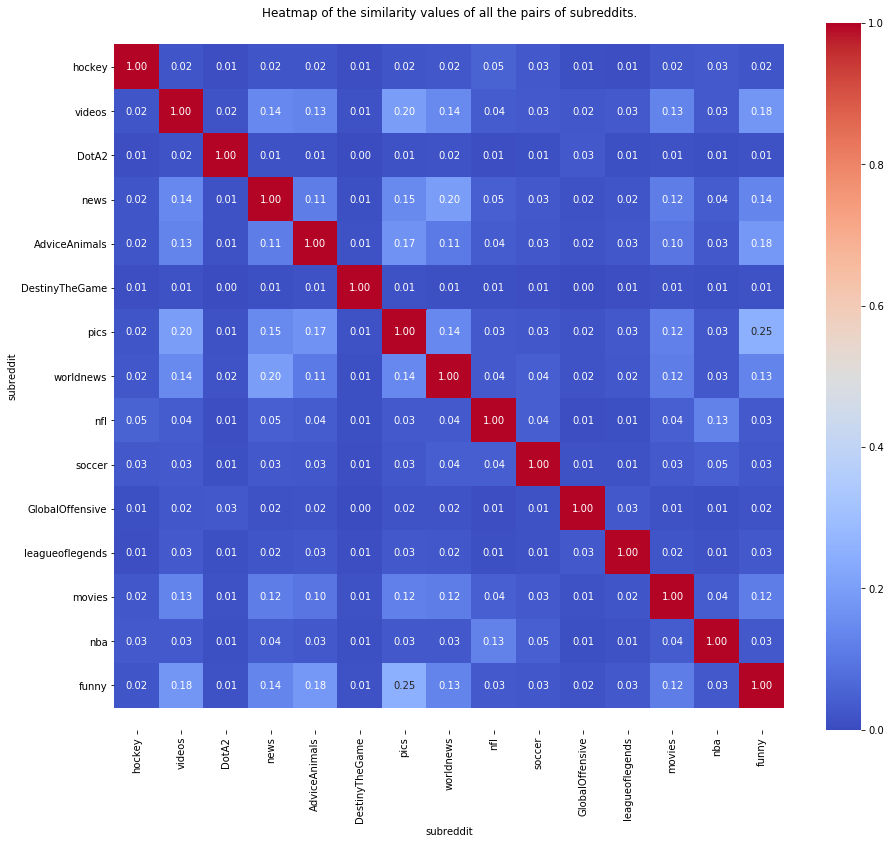

In [84]:
# Plotting the heatmap.
Jaccard_users_df.fillna(value=np.nan, inplace=True)
plt.figure(figsize=(15,13))
ax = sns.heatmap(Jaccard_users_df, vmin=0, vmax=1, annot=True, fmt=".2f", cmap = "coolwarm")

# This is a small fix to have the heatmap not be cropped on the top and bottom parts.
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Heatmap of the similarity values of all the pairs of subreddits.')

ax;

Analysis: 

Compared to the previous heatmaps based on words, we already see that the similarity based on users is way less. But we can still identify relatively highly similar pairs of subreddits.

One of the most similar pair of subredits we encountered is the (funny, pics) with 0.25 jaccard similarity. This result is expected since both subreddits are default subreddits: a default subreddit in May 2015 is a subreddit that users are automatically subscribed to when they create a registered account on Reddit.

Although here we are not trucking the similarity between subscribers: if someone is subscribed to a subreddit, he is exposed to post in that subreddit. So he is more likely to comment in them, and become a 'user'. 
Furthermore, pics and funny mostly share the same content: easily digestable posts that don't contain texts.

On the other end of the spectrum, we can see that there are pairs that have really low user similarity. For instance we can take the pairs (dota2, soccer), (dota2, nba) and (dota2, hockey). Here non of the subreddits are enabled by default, and dota2 is a computer game and that demographic is not interested in sports.

More generally, we noticed that the pairs that have more that 0.1 similarity are all default subreddits: (lien)
Except AdviceAnimals, which has high similarity with all other default subreddits but isn't one itsef. After doing some research, we found that it was indeed a default subreddit in 2014, but was removed in 2015. So the users that had accounts dating more tha a year were probably sill subscribed to that subreddit beacause the removal was not done retroactively.


## B4. Language vs. Users similarity
    
* Visualize the similarity scores based on word (**B2.3.**) and user (**B3**) similarity on the x and y axes respectively for the subreddit `NBA` compared to all the other subreddits. Do some semantically meaningful groups emerge? Provide clear explanataions of your observations.
* Furthermore, do you observe differences in similarities between various sports-related subreddits in the dataset? Please provide explanations of the reasons behind these differences, if any!

In [85]:
# First, we get the jaccard similarity of the subreddit nba paired with all other 
# subredits over the 1k most frequent words.
nba_words_jaccard = Jaccard_1k_vocab_df.loc['nba']

# Also, we get the jaccard similarity of the subreddit nba paired with all other 
# subredits over its users.
nba_users_jaccard = Jaccard_users_df.loc['nba']

# We create 2 dataframes, one having similarities of words and users among all non-sport subreddits, and the other 
# with similarities of words and users amon sport subreddits (hockey, nf, soccer).
jaccard_words_users = pd.DataFrame({'nba_words_jaccard': nba_words_jaccard, 'nba_users_jaccard': nba_users_jaccard}).drop('nba').reset_index()
jaccard_words_users

,subreddit,nba_words_jaccard,nba_users_jaccard
0,hockey,0.56740,0.03342
1,videos,0.44653,0.03352
2,DotA2,0.39762,0.00917
3,news,0.39567,0.03579
4,AdviceAnimals,0.44132,0.03110
5,DestinyTheGame,0.37931,0.00879
6,pics,0.44300,0.02862
7,worldnews,0.37406,0.02946
8,nfl,0.54679,0.12541
9,soccer,0.50602,0.04610


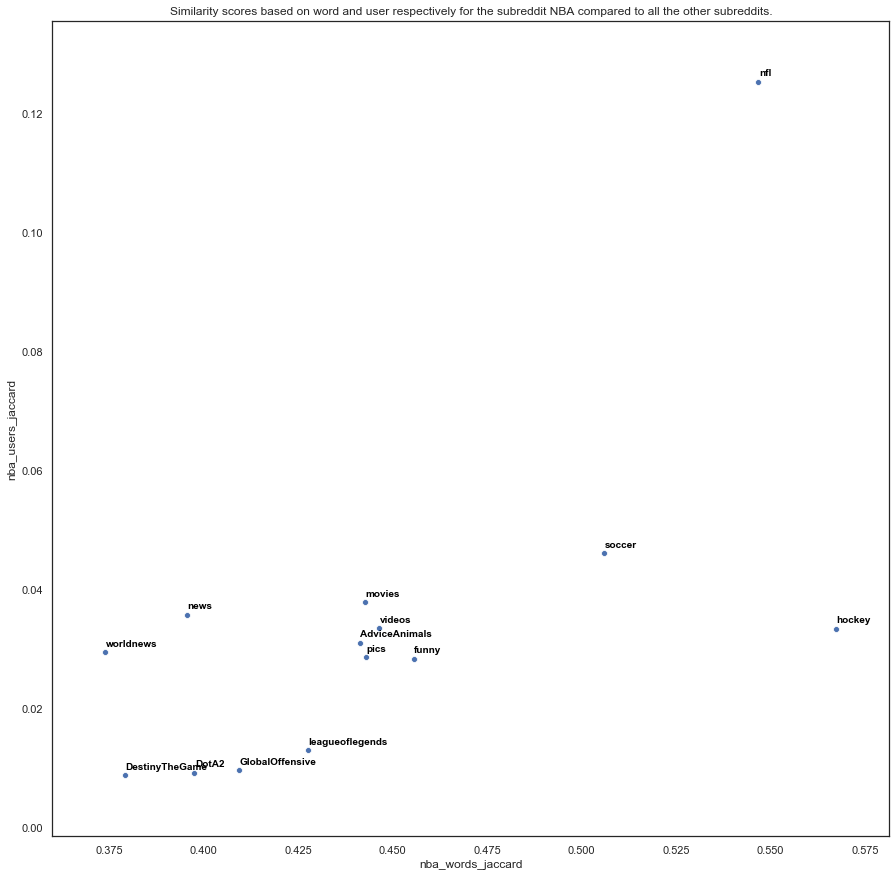

In [86]:
# We plot a scatter plot where x axis is similarity scores based on words, and y axis is similarity scores based
# on users
sns.set(style="white")
plt.figure(figsize=(15, 15))
ax = sns.scatterplot(x="nba_words_jaccard", y="nba_users_jaccard", data=jaccard_words_users)
ax.set_title('Similarity scores based on word and user respectively for the subreddit NBA compared to all the other subreddits.')

for line in range(0, jaccard_words_users.shape[0]):
     ax.text(jaccard_words_users.nba_words_jaccard[line]+0.0001, jaccard_words_users.nba_users_jaccard[line]+0.001, 
     jaccard_words_users.subreddit[line], horizontalalignment='left', 
     size='small', color='black', weight='semibold')

Analysis: 

 Do some semantically meaningful groups emerge? Provide clear explanataions of your observations.
 
 Furthermore, do you observe differences in similarities between various sports-related subreddits in the dataset? Please provide explanations of the reasons behind these differences, if any!


Answer :

From this plot we can see that the NBA subreddit is highly similar to sport subreddits. That similarity can mostly be seen on X axis ( words ), so sports mostly share some of the vocabulary with other sports but the similarity is still low quantatively ( < than 0.575 mostly ) so we can assume that each sport has unique vocabulary that it doesn't share with others.

NBA shares the most users with NFL but shares the same words with HOCKEY, it is to be expected since those 3 sports are mostly american sports mostly followed in america ( a bit less for NBA which is sometimes followed worldwide for big matches ). It also makes sense that soccer is second place for both, american audience is known to follow soccer when the World Cup happens and since the data is from 2015 and the world cup happened in 2014, soccer surely had a surge of users from american-based sports subreddits.

We can divide this plot into 4 corners, we'll analyze each corner separately :

<strong>Top right part :</strong> NFL : This part is for subreddits that are highly similar in both users and words used ( relatively to other subreddits studied ) . These kinds of subreddits are the most similar to NBA.

<strong>Bottom right part :</strong> SOCCER, HOCKEY : This part is for subreddits that are highly similar in terms of words used but mostly do not share the same userbase ( relatively to other subreddits studied ). We can see that the subreddits here are the other sport subreddits that are a bit less watched in the USA but still share the "sports jargon".

<strong>Top left part :</strong> NONE : This part is for subreddits that share the same userbase but don't share the same words used. We don't have any subreddit that share this criteria.

<strong>Bottom left part :</strong> ALL OTHER SUBREDDITS : This part is for subreddits that don't share the same userbase and the same vocabulary ( relatively to other subreddits studied ), these are mostly subreddits that don't discuss the same topic and do not talk about sports. We can see that it is mostly news, funny pictures, videogames etc...

Note : we base our claims about sports popularity in the US on this article https://sportsshow.net/most-popular-sports-in-america/ .


